In [1]:
# импортируем необхомые библиотеки и проведем первичную настройку параметров
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.metrics import matthews_corrcoef

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

### Цель проекта - разведывательный анализ данных
### Описание данных
`
1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16 schoolsup — дополнительная образовательная поддержка (yes или no)
17 famsup — семейная образовательная поддержка (yes или no)
18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)
21 higher — хочет получить высшее образование (yes или no)
22 internet — наличие интернета дома (yes или no)
23 romantic — в романтических отношениях (yes или no)
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28 absences — количество пропущенных занятий
29 score — баллы по госэкзамену по математике
`


Целевая переменная **score** - относится к количественному признаку    
Согласно описанию у нас должны быть следующие группы признаков:
1. Количественные признаки:    
  * age
  * absences
2. Порядковые признаки:
  * Medu
  * Fedu
  * traveltime
  * studytime
  * failures
  * famrel
  * freetime
  * goout
  * health
3. Бинарные признаки
  * sex
  * address
  * famsize
  * Pstatus
  * schoolsup
  * famsup
  * paid
  * activities
  * nursery
  * higher
  * internet
  * romantic
4. Номинальные признаки
  * school
  * Mjob
  * Fjob
  * reason
  * guardian

In [3]:
# загрузим наш набор данных
stud = pd.read_csv('stud_math.csv')

In [4]:
# проверяем что у нас с данными
stud.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [5]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

 Найдено несоответствие количества заявленных столбцов реальному. Появился столбец 'studytime, granular'   
 К какому типу его отнести станет понятно после более детального анализа.   
 Набор данных содержит пропуски. 

**Попробуем оценить насколько велико отсутствие пропусков в процентном отношении по столбцам**

In [6]:
for col in stud.columns:
    pct_missing = np.mean(stud[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime, granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


Полученный результат говорит о том, что у нас нет признаков, которые нам пришлось бы полностью отбросить по причине пропущенных данных. В ходе дальнейшего анализа нам нужно будет понять будем ли мы избавлятья от каких-либо строк, либо будем пытаться внести недостающие значения.   
Следует особо обратить внимание на **наличие пропусков в целевой переменной**. Строки с пропусками в целевой переменной нужно будет удалить. 

In [7]:
# Проведем анализ строк по количеству пропусков в колонках.
# добавим дополнительные столбцы с "картой" отсутствующих значений
for col in stud.columns:
    missing = stud[col].isnull()
    count_missing = missing.sum()
    if count_missing > 0:
        stud['{}_ismissing'.format(col)] = missing

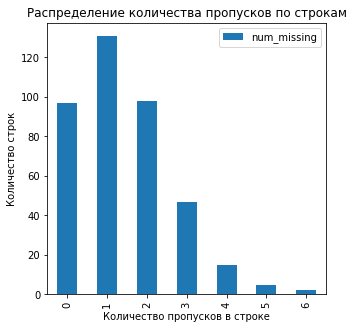

In [8]:
# теперь подготовим данные для гистограммы количества пропусков в одной строке.
ismissing_columns = [col for col in stud.columns if '_ismissing' in col]
stud['num_missing'] = stud[ismissing_columns].sum(axis=1)
stud['num_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='num_missing', title='Распределение количества пропусков по строкам')
plt.ylabel('Количество строк')
plt.xlabel('Количество пропусков в строке')
plt.show()

In [9]:
stud['num_missing'].value_counts().reset_index().sort_values(by='index')

,index,num_missing
2,0,97
0,1,131
1,2,98
3,3,47
4,4,15
5,5,5
6,6,2


Полный набор данных у нас содержится  в 97 строках. Факически, только четверть набора у нас содержит строки без пропусков. Не очень хороший результат, на мой взгляд.  По одному пропуску еще в 131 строках  - это тоже довольно большой процент данных.   
Также у нас есть строки с пропуском более 2 переменных - 69 строк - около 20 процентов всех данных. Решение об их удалении можно будет сделать позже, для начала нужно будет избавиться от строк в которых у нас есть в пропуски в целевой переменной **score**

In [10]:
# удаляем score isnull
index_missing = stud[stud['score'].isnull()].index
stud.drop(index_missing, axis=0, inplace=True)

In [11]:
# проверим результат
stud['num_missing'].value_counts().reset_index().sort_values(by='index')

,index,num_missing
2,0,97
0,1,130
1,2,97
3,3,43
4,4,15
5,5,5
6,6,2


Имеет смысл также удалить строки в которых попущенно более 4 значений переменной. это составляет порядка 15 процентов столбцов. Нет смысла держать эти данные


In [12]:
index_missing = stud[stud['num_missing'] > 4].index
stud.drop(index_missing, axis=0, inplace=True)

In [13]:
stud['num_missing'].value_counts().reset_index().sort_values(by='index')

,index,num_missing
2,0,97
0,1,130
1,2,97
3,3,43
4,4,15


Итого, после удаления строк, у нас нас осталось 58 строк в которых есть более двух пропусков в предикторах.

У нас довольно мало количественных признаков, начнем с них анализ данных. В ходе анализа нам нужно будет разобраться, что делаем с выбросами, а что с пропусками.

# Количественные признаки

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b548150>,
      dtype=object)

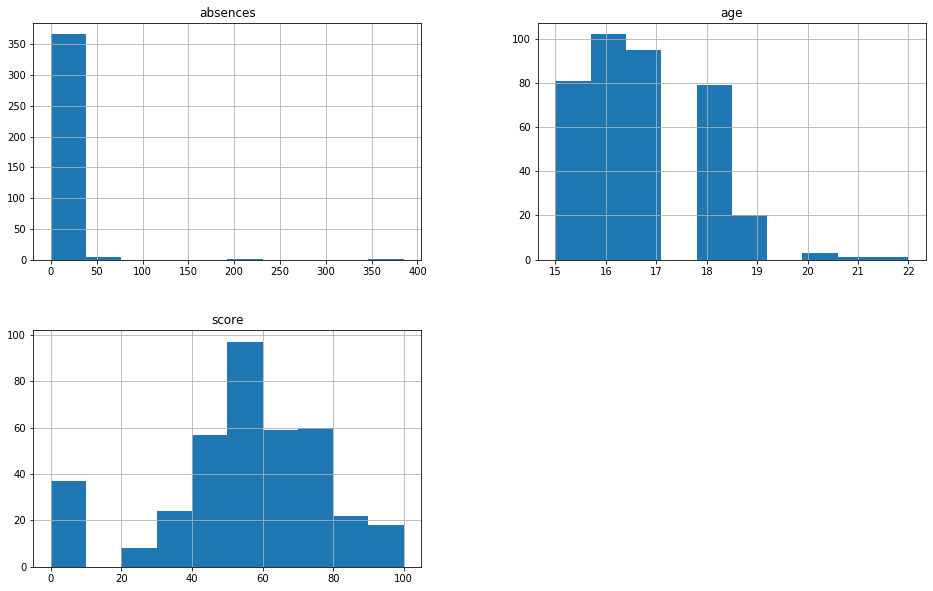

In [14]:
num_features = ['age', 'absences', 'score']
stud_num_features = stud[num_features]
stud_num_features.hist(figsize=(16, 10))

Ситуация с данными не очень, посмотрим более детально на каждый признак в отдельности.

In [15]:
matplotlib.rcParams['figure.figsize'] = (5, 5)

**Признак age**

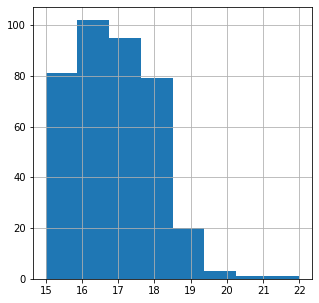

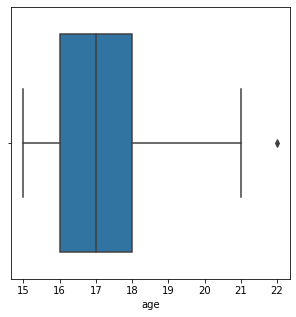

Количество пропущенных даных 0


count    382.000000
mean      16.667539
std        1.266132
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [16]:
stud.age.hist(bins=8)
plt.show()
sns.boxplot(stud.age)
plt.show()
print('Количество пропущенных даных', stud.age.isnull().sum())
stud.age.describe()

In [17]:
# надо понять сколько же у нас учеников в "зоне выброса"
stud.age.value_counts()

16    102
17     95
15     81
18     79
19     20
20      3
22      1
21      1
Name: age, dtype: int64

Итак, как мы видим, основное количество учащихся находится в возрасте от 15 до 18 лет. Согласно графику, есть выброс - 22 года. Однако, в условии задачи у нас явно отмечено, что учашиеся в возрасте от 15 до 22-х лет. Данные оставляем как есть. 

**Признак absences**

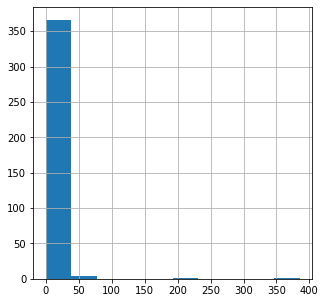

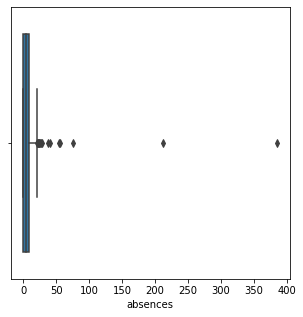

Количество пропусков 10


count    372.000000
mean       7.233871
std       23.761997
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [18]:
stud.absences.hist()
plt.show()
sns.boxplot(stud.absences)
plt.show()
print('Количество пропусков', stud.absences.isnull().sum())
stud.absences.describe()

Наблюдаем довольно большое количество выбросов, но есть несколько явных, попробуем посмотреть на данные без них

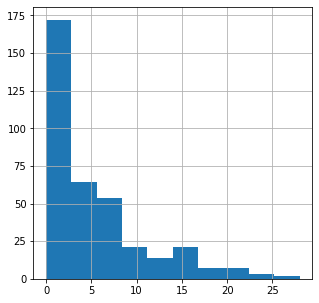

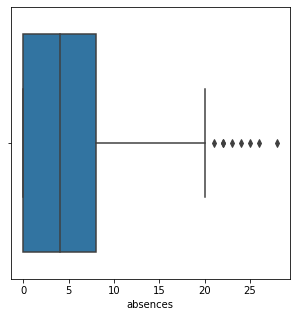

count    365.000000
mean       5.016438
std        5.710483
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       28.000000
Name: absences, dtype: float64

In [19]:
stud[stud['absences'] <= 30].absences.hist()
plt.show()
sns.boxplot(stud[stud['absences'] <= 30].absences)
plt.show()
stud[stud['absences'] <= 30].absences.describe()

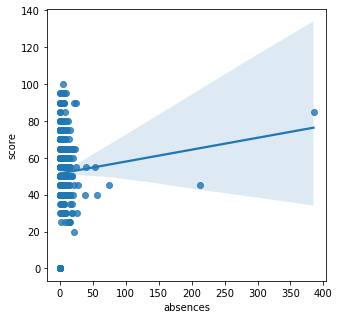

In [20]:
sns.regplot(x='absences', y='score', data=stud)

Займемся выбросами

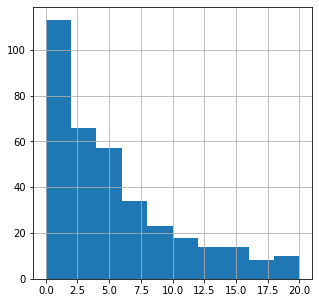

In [21]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc50 = stud.absences.quantile(0.5)
perc75 = stud.absences.quantile(0.75)
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10,
                                                                                  label='IQR')

Разберемся с пропусками и выбросами. Пропусков в данных - 10 штук

In [22]:
# Выбросы
print('Общее число строк, попавшее в выбросы, включая пустые значения:',
      len(stud.absences.loc[~stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].index))

Общее число строк, попавшее в выбросы, включая пустые значения: 25


Всего получается, что мы должны будем обновить 25 строк. Если мы проставим значение медианы - в этом случае, у нас распределение может "съехать" Имеет смысл проанализировать, что нам можно удалить, а что можно оставить

In [23]:
# Оценим строки с выбросами по отношению к другим строкам с пропущенными данными
index = stud.absences.loc[~stud.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].index
stud.loc[index, 'num_missing'].sort_values()

315    0
103    0
205    0
24     1
307    1
277    1
222    1
216    1
352    1
390    1
150    1
101    1
74     1
40     1
183    1
198    2
172    2
120    2
260    2
276    2
320    2
254    3
265    3
215    3
129    4
Name: num_missing, dtype: int64

Есть строки, в которых более одного пропуска в данных. Можно попробовать их удалить

In [24]:
to_delete = stud.loc[index, 'num_missing'].sort_values()
index = to_delete[to_delete > 1].index
stud.drop(index, axis=0, inplace=True)

In [25]:
# проверим результат по пропущенным значениям
stud['num_missing'].value_counts().reset_index().sort_values(by='index')

,index,num_missing
1,0,97
0,1,130
2,2,91
3,3,40
4,4,14


In [26]:
index = stud.absences.loc[~stud.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].index

In [27]:
stud.loc[index, 'absences'] = perc50

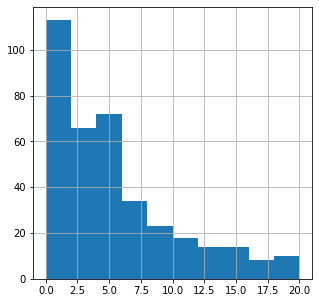

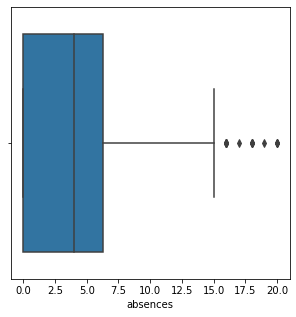

count    372.000000
mean       4.569892
std        4.905353
min        0.000000
25%        0.000000
50%        4.000000
75%        6.250000
max       20.000000
Name: absences, dtype: float64

In [28]:
# проверяем что получилось
stud.absences.hist()
plt.show()
sns.boxplot(stud.absences)
plt.show()
stud.absences.describe()

На графике опять появились выбросы, но мы пока что их трогать не будем

**Построим матрицу корреляции**

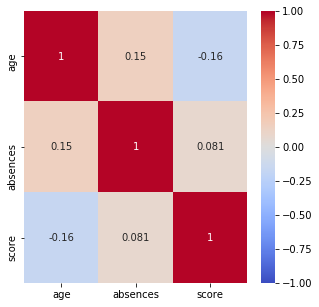

In [29]:
# сперва без отбрасывания выбросов по пропущенным занятиям
num_features = ['age', 'absences', 'score']
stud_num_features = stud[num_features]
sns.heatmap(stud_num_features.corr(), vmin=-1, vmax=1,
            center=0, annot=True, cmap='coolwarm')

мы наблюдаем обратную линейную зависимость целевой переменной с возрастом учащегося, что может быть и позволит нам предположить, что речь идет о тех, кто не успевал в полной мере или же поступил в учебное заведение в более позднем возрасте ввиду разных причин. Это только предположение :)

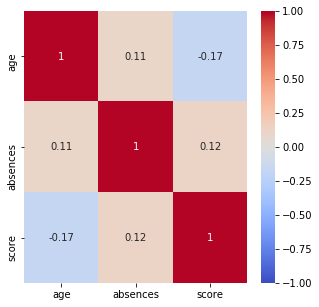

In [30]:
# попробуем посчитать c учетом "новых" выбросов
num_features = ['age', 'absences', 'score']
stud_num_features = stud[num_features]
sns.heatmap(stud_num_features[stud_num_features['absences'] <= 15].corr(),
            vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')

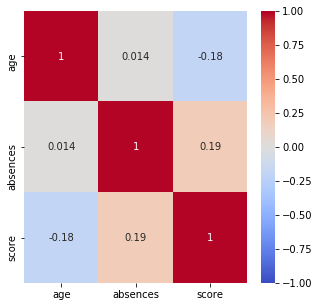

In [31]:
num_features = ['age', 'absences', 'score']
stud_num_features = stud[num_features]
sns.heatmap(stud_num_features[stud_num_features['absences'] <= 10].corr(),
            vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')

если мы устраним выбросы и даже оганичим количество пропусков 10-ю, то можно заметить, что зависимость score от количества пропусков увеличилась. Зависимость эта положительная. Это может означать, что учащийся успешен в учебе, что позволяет ему пропускать занятия, либо он может заниматься дистанционно (мы не знаем как ведется учет занятий). Также следует отметить что уменьшилась взаимная зависимость возраста от количества пропущенных занятий при ограничении параметра absences до 10, а также увеличилась обратная зависимость между возрастом и успеваемостью. **На это стоит обратить внимание при дальнейшей работе с данными.**

**Признак score**

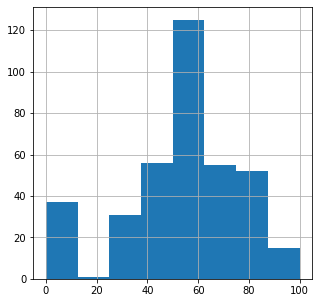

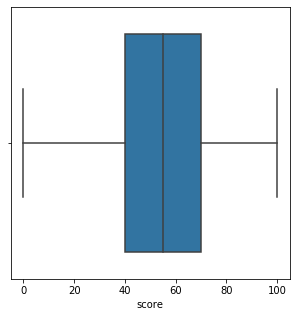

count    372.000000
mean      51.666667
std       23.012165
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [32]:
stud.score.hist(bins=8)
plt.show()
sns.boxplot(stud.score)
plt.show()
stud.score.describe()

Явных выбросов у нас нет, однако есть значение равное 0. Это может означать либо пропуск в данных, которые были заполнены нулем, либо несдачу/неявку на экзамен по самым разным причинам. Посмотрим на данные более детально

In [33]:
stud[stud.score < 40].score.value_counts()

0.0     37
30.0    15
35.0     9
25.0     7
20.0     1
Name: score, dtype: int64

Немного поработаем с данными score

Text(0.5, 1.0, 'Сдал/не сдал (1/0)')

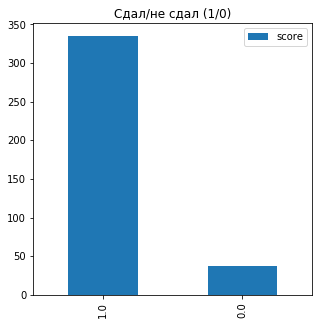

In [34]:
check_score = pd.DataFrame()
check_score = stud[num_features].copy()
check_score['score'] = stud.score.apply(lambda x: x if x == 0 else 1)
check_score['score'].value_counts().plot(kind='bar', label='score')
plt.legend()
plt.title('Сдал/не сдал (1/0)')

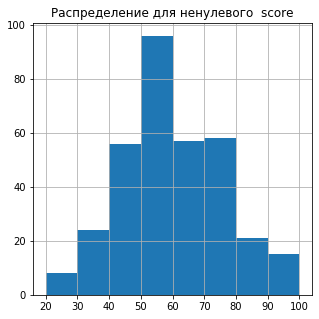

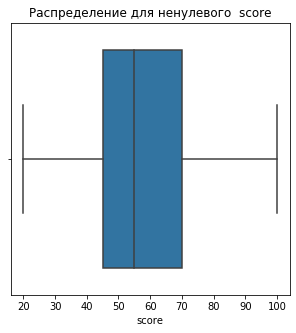

count    335.000000
mean      57.373134
std       16.119720
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [35]:
stud[stud.score > 0].score.hist(bins=8)
plt.title('Распределение для ненулевого  score')
plt.show()

sns.boxplot(stud[stud.score > 0].score)
plt.title('Распределение для ненулевого  score')
plt.show()

stud[stud.score > 0].score.describe()

Порядка 10 процентов данных у нас имеет значение 0    

Можно было бы рекомендовать разбить задачу на две части:    
* Проверка на сдал/не сдал
* Прогнозирование оценки    

В нашем случае, поскольку мы хотим получить прогнозирование оценки,следует обратить внимание на **необходимость очистки нулевых значений score перед запуском обучения модели.** Удалять данные необходимо после всех выполненных преобразований и заполнений пропусков в других данных.    
Дальше мы попробуем разобраться, что нам делать со score = 0    
**Также следует отметить, что если убрать score = 0, то у нас получается нормальное распределение**


**Оценим что у нас происходит с числовыми параметрами**    
это можно сделать на графиках и тепловых картах

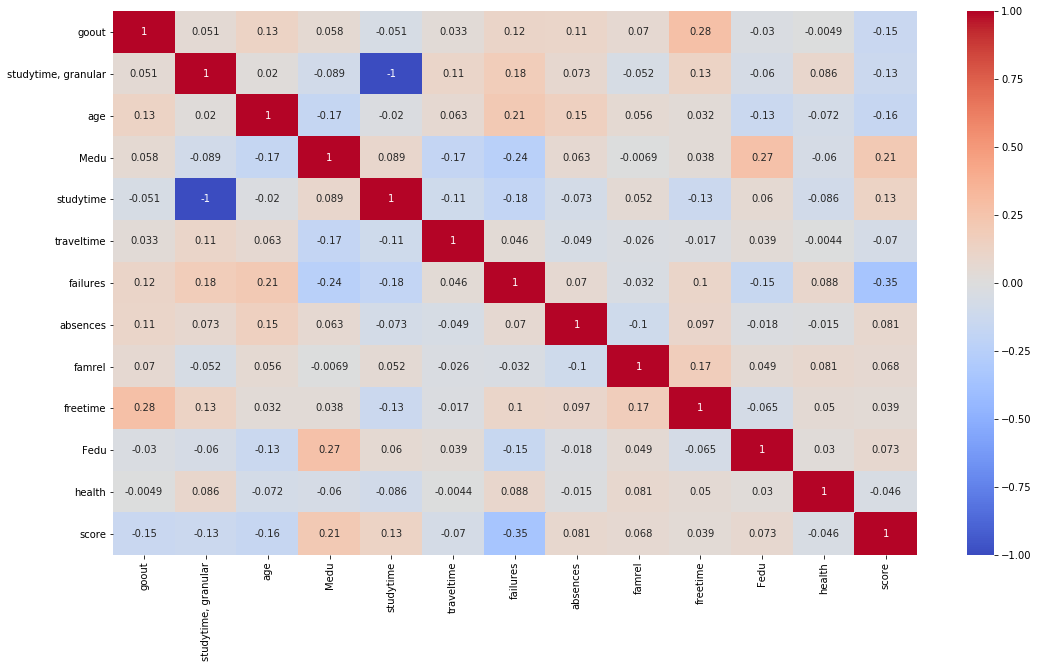

In [36]:
ismissing_columns = [col for col in stud.columns if 'missing' in col]
features = list(set(stud.columns) - set(ismissing_columns))
matplotlib.rcParams['figure.figsize'] = (18, 10)
sns.heatmap(stud[features].corr(), vmin=-1, vmax=1,
            center=0, annot=True, cmap='coolwarm')

Обнаружены отрицательно скоррелированные значения studytime и studitime,granular. От какого-то из этих значений можно будет избавиться. Наиболее сильно "скоррелированы" с целевой переменной признаки Medu, failures, age, goout, studytime. Следует отметить что наиболее выделяются по взаимной корреляции Fedu - Medu, freetime - goout, age - failures

In [37]:
# отбросим служебные колонки
ismissing_columns = [col for col in stud.columns if 'missing' in col]
features = list(set(stud.columns) - set(ismissing_columns))

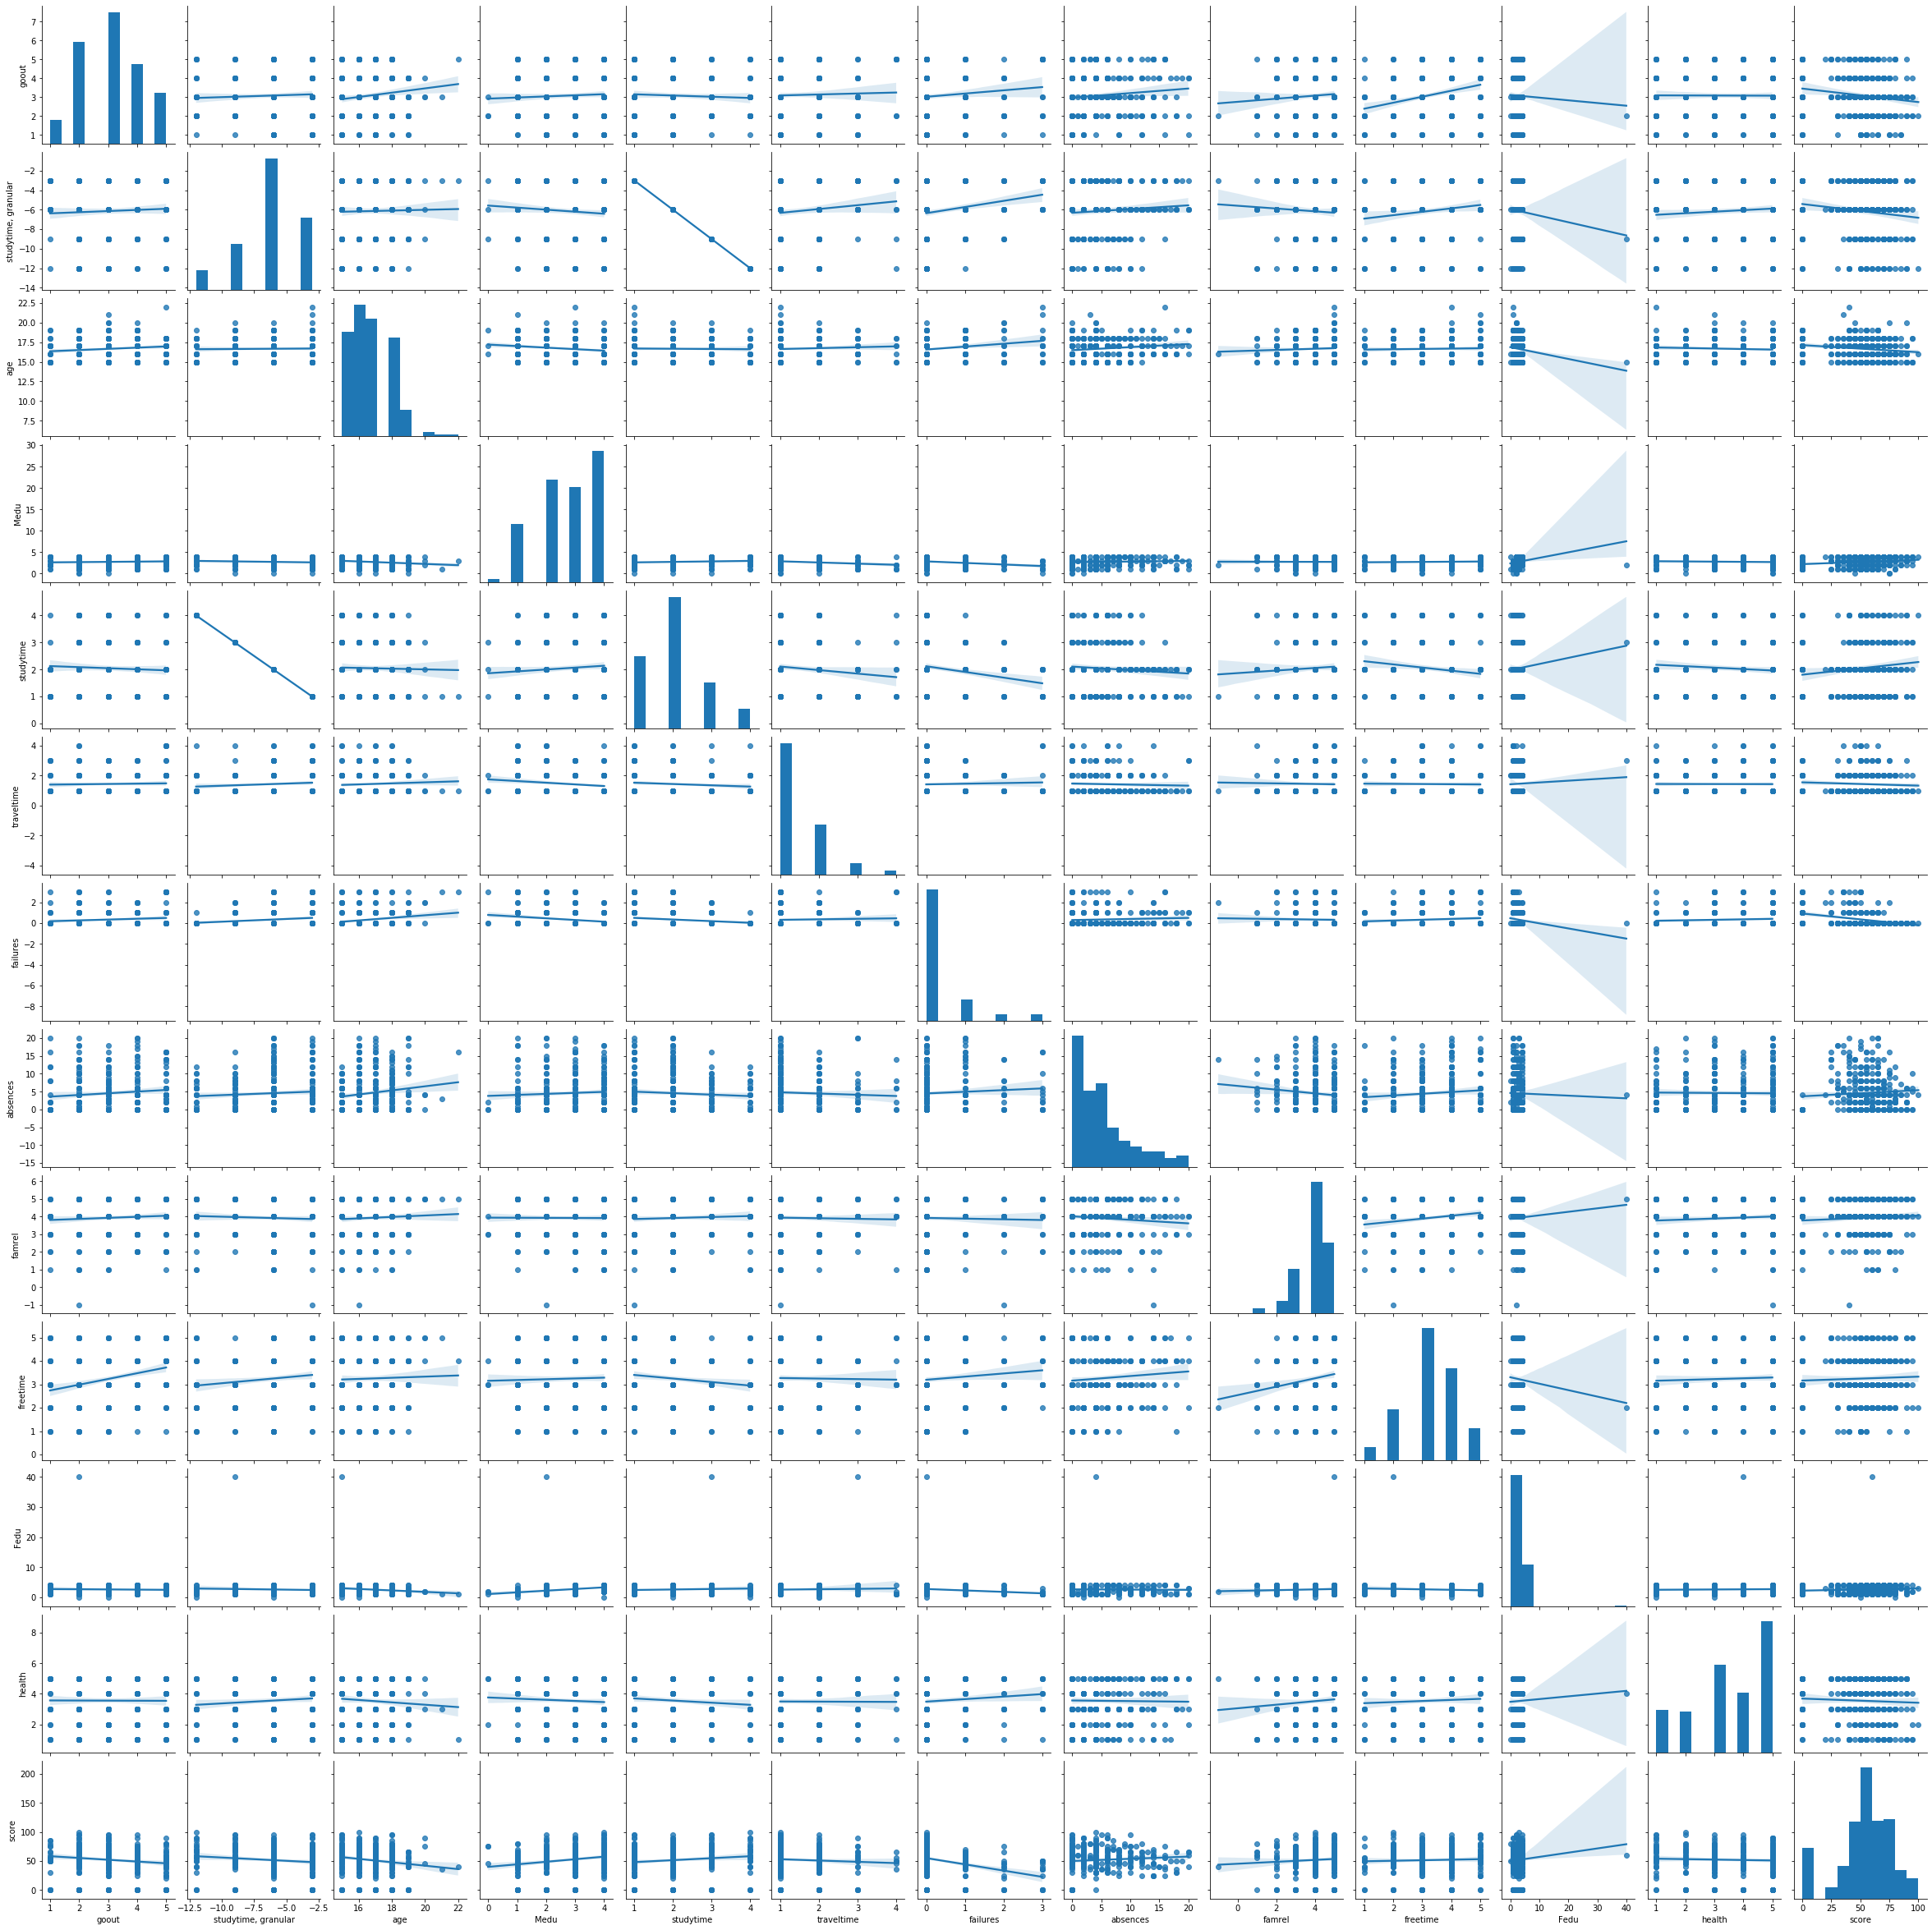

In [38]:
sns.pairplot(stud[features], kind='reg')

Мы видим, что в признаке Fedu у нас есть выбросы

**Устраним явный выброс по признаку Fedu**

In [39]:
# Функция вывода информации по колонке
def checkCatColumn(column):
    matplotlib.rcParams['figure.figsize'] = (5, 5)
    print('\033[1m', '** Данные по колонке {} **'.format(column), '\033[0m')
    display(pd.DataFrame(stud[column].value_counts(dropna=False)))
    # pd.DataFrame(stud[column].value_counts())[column].hist()
    print('Количество уникальных значений', stud[column].nunique())
    print('Распределение данных в процентном соотношении')
    display(pd.DataFrame(round(stud[column].value_counts(
        normalize=True, dropna=False)*100, 2)))
    print('\n\n')
    stud[column].value_counts(dropna=False).plot(kind='bar')
    plt.title('Признак {} - количество уникальных значений'.format(column))
    plt.show()
    sns.boxplot(x=column, y='score', data=stud)
    plt.show()
    print('\n\n')

In [40]:
# Построение графика плотности распределения
def showDensity(feature, feature_by):
    types = stud.dropna(subset=[feature])
    types = types[feature_by].value_counts()
    types = list(types.index)
    # Plot of distribution of scores for building categories
    matplotlib.rcParams['figure.figsize'] = (12, 10)
    # Plot each building
    for b_type in types:
        # Select the building type
        subset = stud[stud[feature_by] == b_type]

        # Density plot of Energy Star scores
        sns.kdeplot(subset[feature].dropna(),
                    label=b_type, shade=False, alpha=0.8)

    # label the plot
    plt.xlabel('{}'.format(feature), size=20)
    plt.ylabel('Density', size=20)
    plt.title('Density Plot of {} by {}'.format(feature, feature_by), size=28)

 ** Данные по колонке Fedu ** 


,Fedu
2.0,99
3.0,90
4.0,84
1.0,73
NaN,23
0.0,2
40.0,1


Количество уникальных значений 6
Распределение данных в процентном соотношении


,Fedu
2.0,26.61
3.0,24.19
4.0,22.58
1.0,19.62
NaN,6.18
0.0,0.54
40.0,0.27


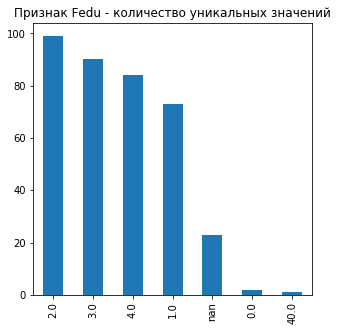

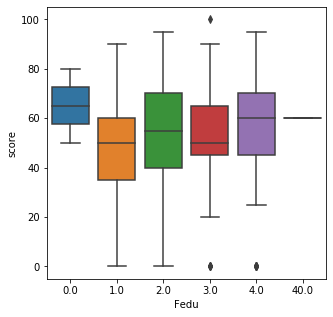

In [41]:
checkCatColumn('Fedu')

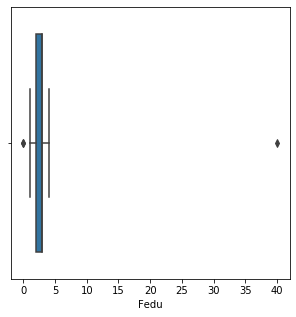

In [42]:
sns.boxplot(stud.Fedu)

имеем в наличии явный выброс - 40. Это может быть некорректно заполненное значение 4. Попробуем его заменить на корректное 4

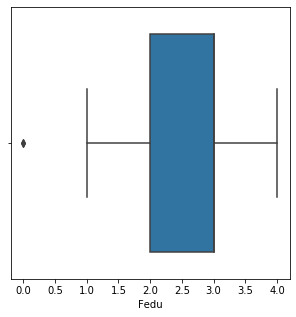

In [43]:
index = stud[stud.Fedu == 40].index
stud.loc[index, 'Fedu'] = 4
sns.boxplot(stud.Fedu)

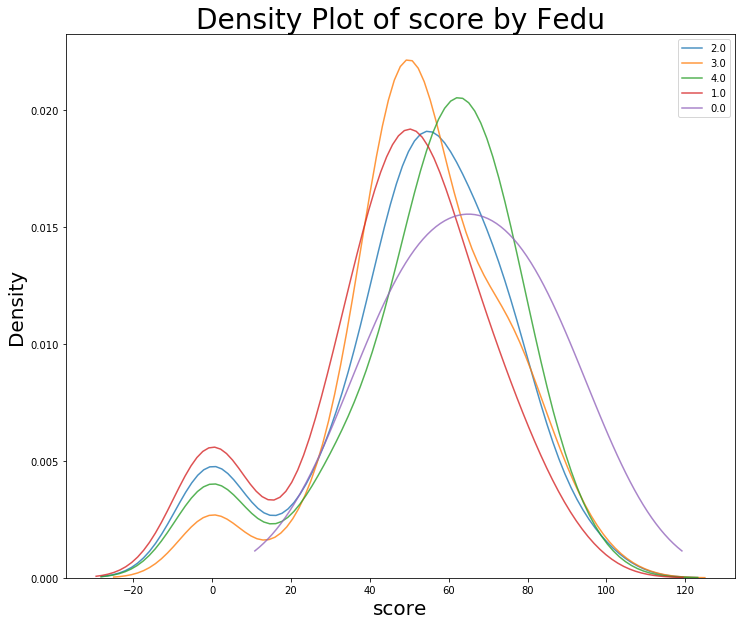

In [44]:
showDensity('score', 'Fedu')

Посмотрим более детально на значения Fedu = 0

In [45]:
stud[features][stud.Fedu == 0]

,goout,paid,"studytime, granular",nursery,internet,schoolsup,activities,age,romantic,Pstatus,Fjob,Medu,studytime,traveltime,failures,school,guardian,famsize,higher,sex,absences,address,famrel,freetime,famsup,Mjob,reason,Fedu,health,score
76,3.0,no,-12.0,yes,yes,no,yes,15,no,T,other,4.0,4.0,2.0,0.0,GP,mother,NaN,NaN,M,8.0,U,3.0,4.0,no,teacher,course,0.0,1.0,50.0
171,2.0,yes,-6.0,yes,yes,no,yes,16,yes,T,other,1.0,2.0,2.0,NaN,GP,mother,GT3,NaN,M,2.0,U,4.0,3.0,yes,other,reputation,0.0,3.0,80.0


В целом, всего два значения, но у нас довольно много пропусков, попробуем разобраться какая есть зависимость от других переменных

In [46]:
display(pd.crosstab([stud['address'], stud['Fjob']],
                    stud['Fedu'], margins=True))
display(pd.crosstab([stud['guardian']],
                    stud['Fedu'], margins=True))

Fedu              0.0  1.0  2.0  3.0  4.0  All
address Fjob                                  
R       at_home     0    0    1    1    1    3
        health      0    0    0    0    2    2
        other       0   15   13    5    6   39
        services    0    6    5    5    3   19
        teacher     0    0    0    0    5    5
U       at_home     0    2    4    2    1    9
        health      0    1    1    3    6   11
        other       2   29   38   39   22  130
        services    0   11   20   23   14   68
        teacher     0    0    0    1   18   19
All                 2   64   82   79   78  305

Fedu,0.0,1.0,2.0,3.0,4.0,All
guardian,,,,,,
father,0,12,18,25,21,76
mother,2,49,70,48,53,222
other,0,7,5,6,3,21
All,2,68,93,79,77,319


In [47]:
ct = pd.crosstab([stud['address'], stud['Fjob']],
                 stud['Fedu'])


def fillFedu(row):
    if pd.isnull(row['Fedu']):
        mode = stud['Fedu'].mode()[0]
        idx1 = row['address']
        idx2 = row['Fjob']
        if pd.isnull(idx1) or pd.isnull(idx2):
            return mode
        if (idx1, idx2) in ct.index:
            s = ct.loc[(idx1, idx2)].sort_values(ascending=False)
            return s.index[0]
        else:
            return mode
    return row['Fedu']


stud['Fedu'] = stud.apply(lambda x: fillFedu(x), axis=1)

 ** Данные по колонке Fedu ** 


,Fedu
2.0,104
3.0,102
4.0,90
1.0,74
0.0,2


Количество уникальных значений 5
Распределение данных в процентном соотношении


,Fedu
2.0,27.96
3.0,27.42
4.0,24.19
1.0,19.89
0.0,0.54


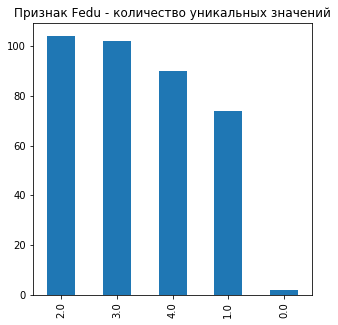

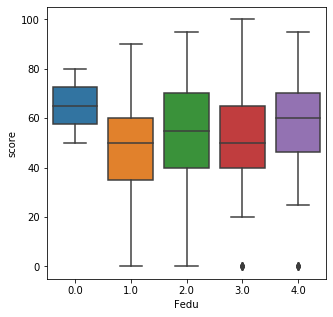

In [48]:
checkCatColumn('Fedu')

У нас видно что для Fedu = 0  есть всего два значения, к тому же, график у нас показывает выброс. Мы не знаем, что означает "Без образования", однако, судя по признаку Fjob - мы видим, что у нас стоит other, что, вероятно, подтверждает необходимость оставить значение Fedu = 0    
**Мы видим, что признак Fedu влияет на целевую переменную. Оставляем ее для дальнейшей работы**

# Номинативные признаки

In [49]:
nom_columns = ['Mjob', 'Fjob', 'reason', 'guardian', 'school']

 ** Данные по колонке Mjob ** 


,Mjob
other,124
services,92
at_home,56
teacher,53
health,32
NaN,15


Количество уникальных значений 5
Распределение данных в процентном соотношении


,Mjob
other,33.33
services,24.73
at_home,15.05
teacher,14.25
health,8.60
NaN,4.03


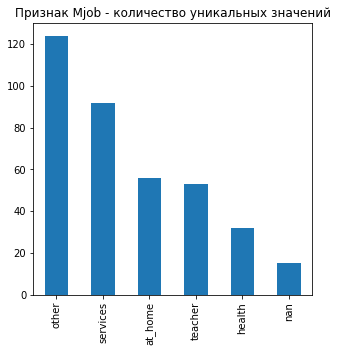

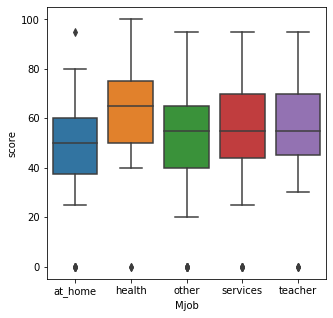

In [50]:
checkCatColumn('Mjob')

Пропущено 15 значений. Мы видим, что госслужба и работа в сфере образования примерно одинаково влияют на целевую переменную. Улучшает показания целевой переменной работа в сфере здравоохранения.

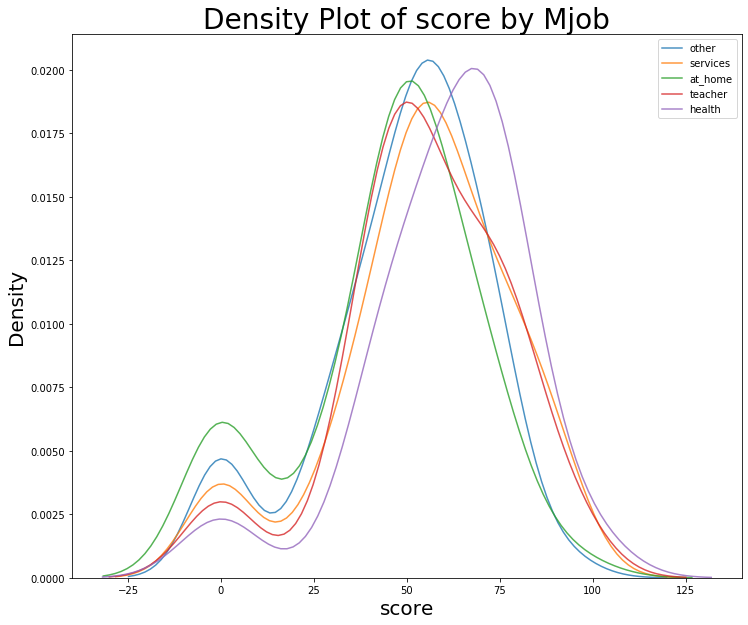

In [51]:
showDensity('score', 'Mjob')

Попробуем найти зависимости между поддержкой семьи, она может быть как в финансовом, так и в моральном плане, а также работой отца

In [52]:
pd.crosstab([stud['famsup'], stud['Fjob']], stud['Mjob'])

Mjob             at_home  health  other  services  teacher
famsup Fjob                                               
no     at_home         2       0      2         0        0
       health          1       0      1         0        0
       other           9       3     31        10        6
       services        8       2     10        15        4
       teacher         1       0      1         1        3
yes    at_home         3       0      2         3        2
       health          1       3      1         3        4
       other          18      12     42        16       11
       services        6       2      7        21       10
       teacher         1       1      5         5        6

In [53]:
# заполним недостающие данные
ct = pd.crosstab([stud['famsup'], stud['Fjob']],
                 stud['Mjob'])


def fillMjob(row):
    if pd.isnull(row['Mjob']):
        mode = stud['Mjob'].mode()[0]
        idx1 = row['famsup']
        idx2 = row['Fjob']
        if pd.isnull(idx1) or pd.isnull(idx2):
            return mode
        if (idx1, idx2) in ct.index:
            s = ct.loc[(idx1, idx2)].sort_values(ascending=False)
            return s.index[0]
        else:
            return mode
    return row['Mjob']


stud['Mjob'] = stud.apply(lambda x: fillMjob(x), axis=1)

 ** Данные по колонке Fjob ** 


,Fjob
other,184
services,96
NaN,34
teacher,27
at_home,16
health,15


Количество уникальных значений 5
Распределение данных в процентном соотношении


,Fjob
other,49.46
services,25.81
NaN,9.14
teacher,7.26
at_home,4.30
health,4.03


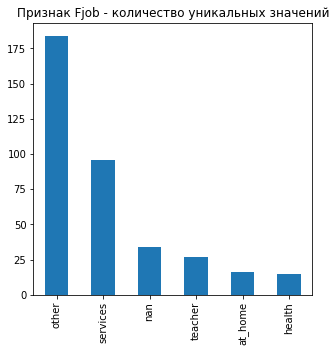

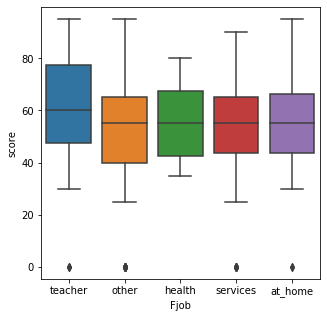

In [54]:
checkCatColumn('Fjob')

довольно много незаполненных данных в сравнении с другими значениями. Мы видим, что в случае работы в сфере образования уровень целевой переменной повышается.

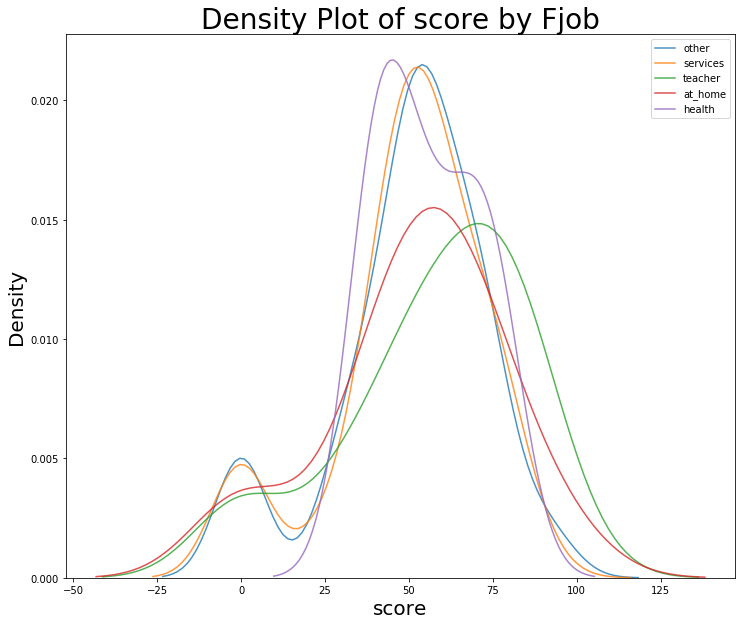

In [55]:
showDensity('score', 'Fjob')

попытаемся заполнить недостающие значения

In [56]:
pd.crosstab([stud['Fedu'], stud['Mjob']], stud['Fjob'])

Fjob           at_home  health  other  services  teacher
Fedu Mjob                                               
0.0  other           0       0      1         0        0
     teacher         0       0      1         0        0
1.0  at_home         1       1     13         4        0
     health          0       0      1         1        0
     other           1       0     28         4        0
     services        1       0      4         8        0
     teacher         0       0      0         1        0
2.0  at_home         4       0      8         3        0
     health          0       0      2         3        0
     other           2       0     32         4        0
     services        2       1     10        13        0
     teacher         0       0      2         3        0
3.0  at_home         0       0      3         5        0
     health          0       0      8         0        0
     other           1       1     22         9        0
     services        1       1      8        13        1
     teacher         1       1     12         8        0
4.0  at_home         0       1      4         2        2
     health          0       3      5         2        1
     other           0       1      8         1        6
     services        1       2      8         8        6
     teacher         1       3      4         4       11

In [57]:
# заполним недостающие данные
ct = pd.crosstab([stud['Fedu'], stud['Mjob']],
                 stud['Fjob'])


def fillFjob(row):
    if pd.isnull(row['Fjob']):
        mode = stud['Mjob'].mode()[0]
        idx1 = row['Fedu']
        idx2 = row['Mjob']
        if pd.isnull(idx1) or pd.isnull(idx2):
            return mode
        if (idx1, idx2) in ct.index:
            s = ct.loc[(idx1, idx2)].sort_values(ascending=False)
            return s.index[0]
        else:
            return mode
    return row['Fjob']


stud['Fjob'] = stud.apply(lambda x: fillFjob(x), axis=1)

In [58]:
stud['Fjob'].isnull().sum()

0

все данные заполнены.

 ** Данные по колонке reason ** 


,reason
course,131
home,97
reputation,96
other,32
NaN,16


Количество уникальных значений 4
Распределение данных в процентном соотношении


,reason
course,35.22
home,26.08
reputation,25.81
other,8.60
NaN,4.30


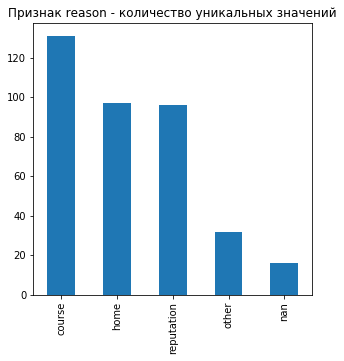

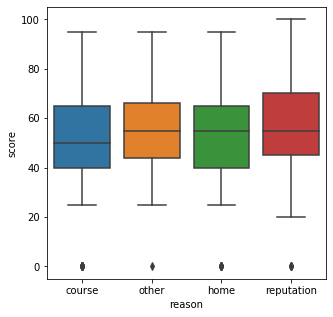

In [59]:
checkCatColumn('reason')

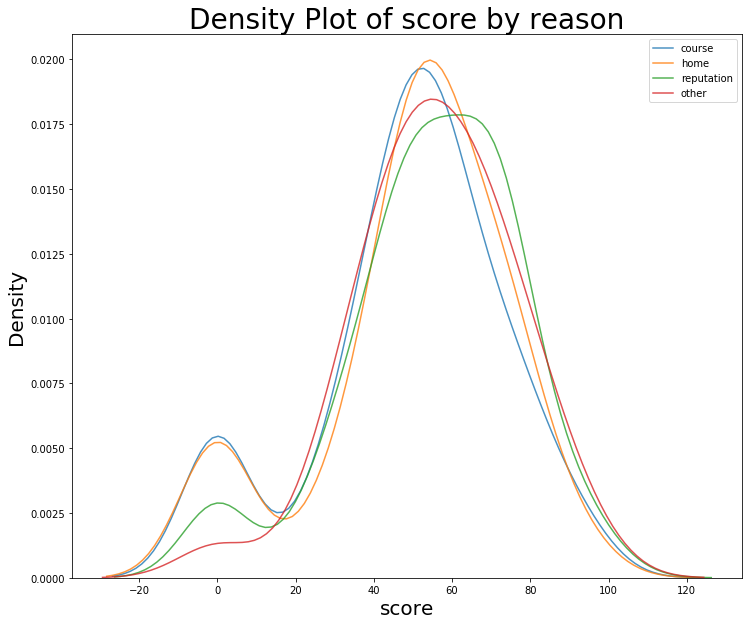

In [60]:
showDensity('score', 'reason')

графики практически идентичны за исключением зоны, где score = 0, следует рассмотреть эту переменную в связке с переменной school

 ** Данные по колонке school ** 


,school
GP,327
MS,45


Количество уникальных значений 2
Распределение данных в процентном соотношении


,school
GP,87.9
MS,12.1


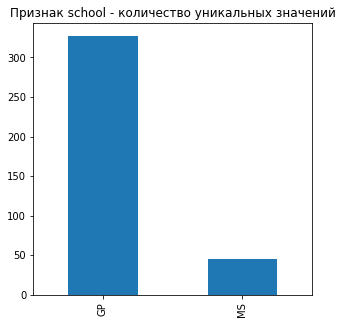

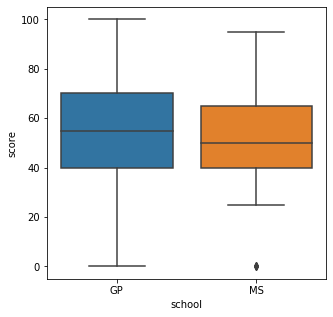

In [61]:
checkCatColumn('school')

Как мы видим у нас всего два значения для школы. В основном, ученики учатся в школе GP. Выборка по школе несбалансирована. также непонятно - будет ли реальный датасет с теми же школами ли будут другие. Посмотрим еще внимательнее, на что у нас влияет этот признак

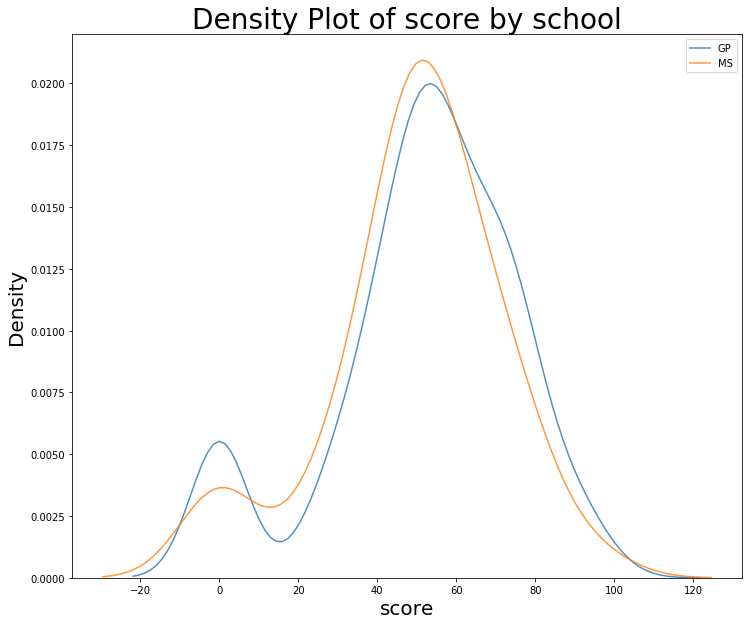

In [62]:
showDensity('score', 'school')

мы опять видим похожую картину - графики расходятся в зоне score = 0

In [63]:
stud[stud.score == 0].groupby('school').score.value_counts()

school  score
GP      0.0      33
MS      0.0       4
Name: score, dtype: int64

Как мы видим, в абсолютном значении у нас количество данных со score = 0 гораздо выше для GP, однако, если посмотреть в процентном соотношении - 0/не 0, то получится, что процент примерно одинаковый - около 10 процентов. Все еще пытаемся понять, что сделать со score = 0. Посмотрим на другие переменные и их связь со школой

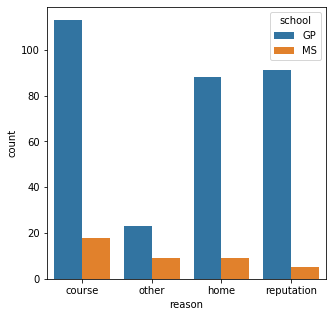

In [64]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
sns.countplot(x='reason', hue='school', data=stud)

In [65]:
pd.DataFrame(stud.groupby('school').reason.value_counts(normalize=True))

reason
school reason              
GP     course      0.358730
       reputation  0.288889
       home        0.279365
       other       0.073016
MS     course      0.439024
       home        0.219512
       other       0.219512
       reputation  0.121951

Процент поступивших в школу MS выше по причине программы школы и близости к дому, репутация школы при этом имеет минимальное значение. Для GP наоборот - на первом месте у нас находится программа и репутация школы. Кстати, стоит отметить, что эти два качества могут влиять на число учащихся, которые будут ездить в более дальнюю школу по причине программы и репутации. Тут тоже довольно большое поле для исследований, но уже нет времени.    
Следующий признак, который мы рассмотрим - возраст учеников

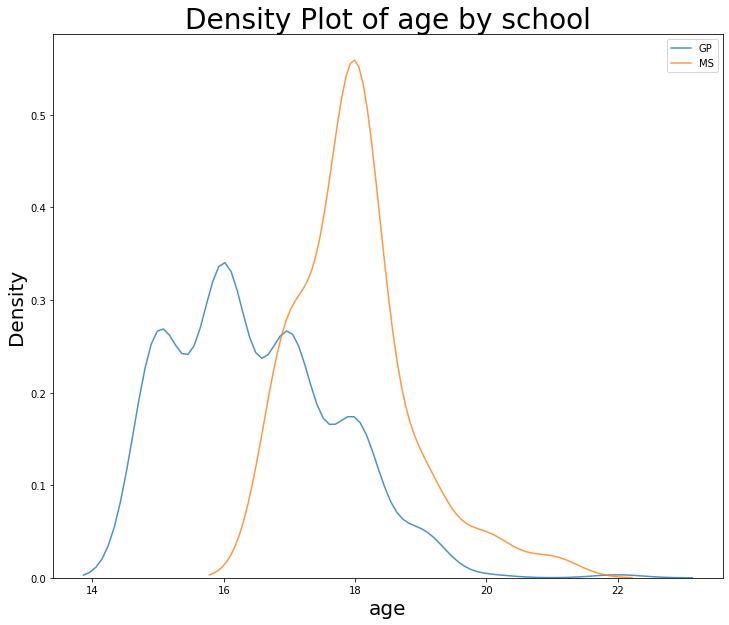

In [66]:
showDensity('age', 'school')

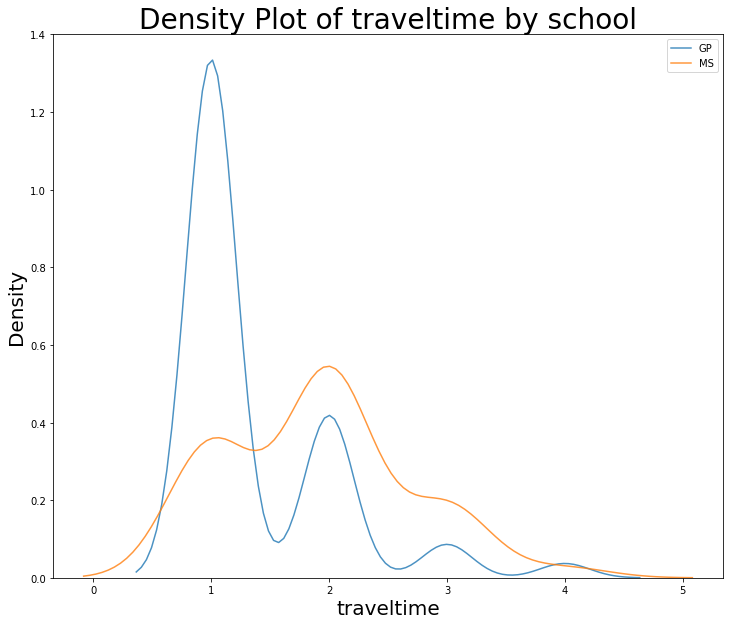

In [67]:
showDensity('traveltime', 'school')

Обнаружилось что возраст учащихся в MS выше, также не совсем подтвердилось наше утверждение, что для GP будет много тех, кто ездит издалека. Скорее наоборот - в MS гораздо больше тех, кто тратит на дорогу больше времени. Это либо школа для более старших учеников, либо же школа со спец.программой, но успеваемость примерно одинакова, если не считать возраста. С другой стороны, экзамены по математике могут сдавать по разным программам: средняя старшая.

In [68]:
# закончим с reason - поставим среднее значение
mode = stud.reason.mode()[0]
stud.reason.fillna(mode, inplace=True)

**Подведем итог**

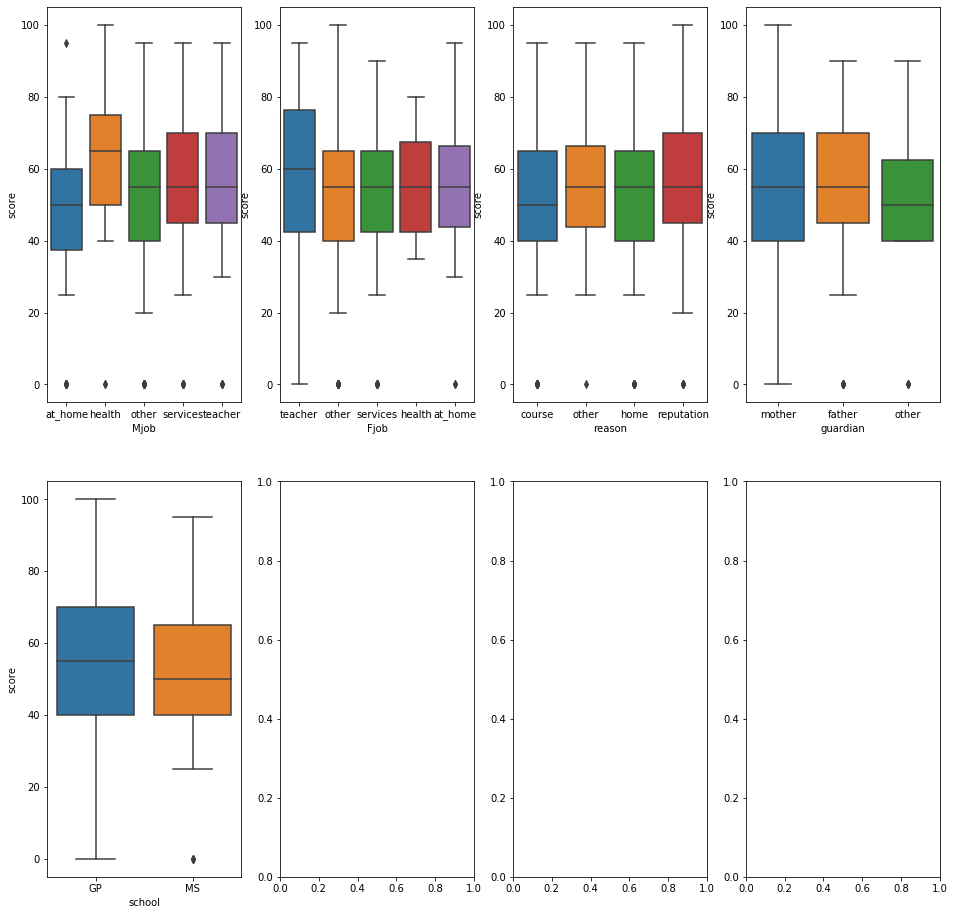

In [69]:
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(16, 16))
for idx, feat in enumerate(nom_columns):
    sns.boxplot(x=feat, y='score', data=stud, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_xlabel(feat)
    axes[int(idx / 4), idx % 4].set_ylabel('score')

**Следует обратить внимание на Mjob, Fjob**

# Порядковые признаки

In [70]:
ord_columns = ['Medu', 'Fedu', 'traveltime', 'studytime',
               'failures', 'famrel', 'freetime', 'goout', 'health']

 ** Данные по колонке Medu ** 


,Medu
4.0,124
2.0,97
3.0,90
1.0,55
0.0,3
NaN,3


Количество уникальных значений 5
Распределение данных в процентном соотношении


,Medu
4.0,33.33
2.0,26.08
3.0,24.19
1.0,14.78
0.0,0.81
NaN,0.81


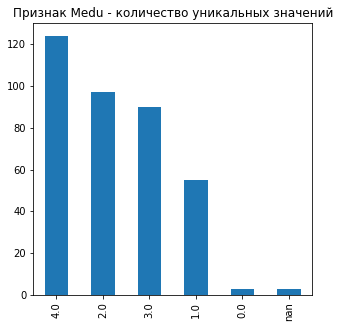

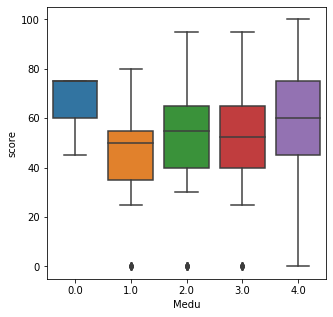

In [71]:
checkCatColumn('Medu')

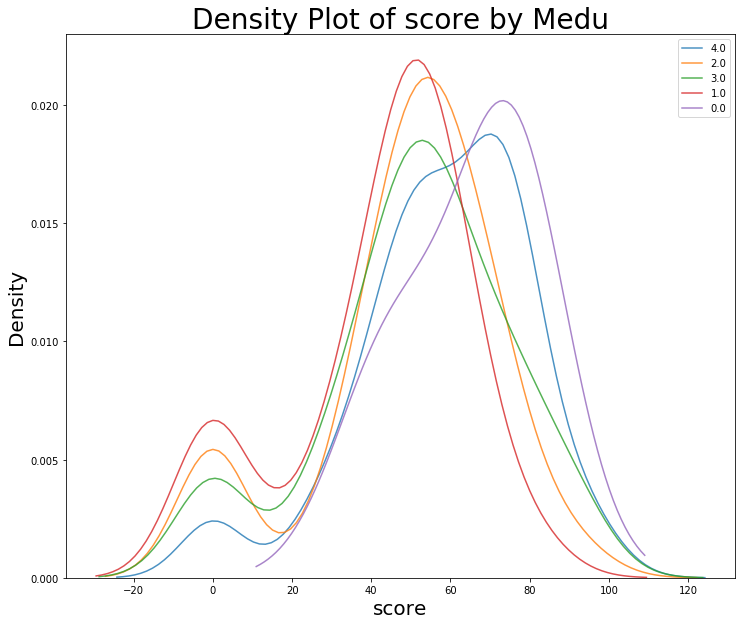

In [72]:
showDensity('score', 'Medu')

Есть влияние на целевую переменную. Количество пропусков позволяет применить заполнение данных "влоб"

In [73]:
mode = stud['Medu'].mode()[0]
stud['Medu'] = stud['Medu'].fillna(mode)

**Признак Fedu - рассмотрели выше**

 ** Данные по колонке Fedu ** 


,Fedu
2.0,104
3.0,102
4.0,90
1.0,74
0.0,2


Количество уникальных значений 5
Распределение данных в процентном соотношении


,Fedu
2.0,27.96
3.0,27.42
4.0,24.19
1.0,19.89
0.0,0.54


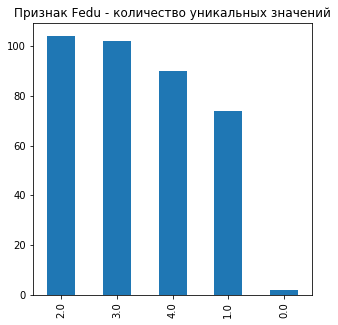

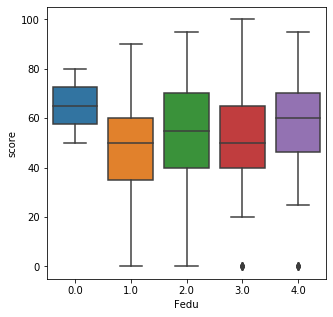

In [74]:
checkCatColumn('Fedu')

 ** Данные по колонке traveltime ** 


,traveltime
1.0,230
2.0,88
NaN,26
3.0,21
4.0,7


Количество уникальных значений 4
Распределение данных в процентном соотношении


,traveltime
1.0,61.83
2.0,23.66
NaN,6.99
3.0,5.65
4.0,1.88


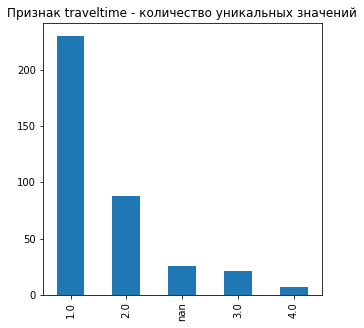

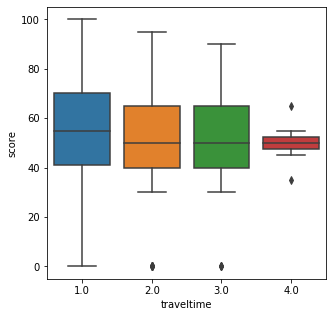

In [75]:
checkCatColumn('traveltime')

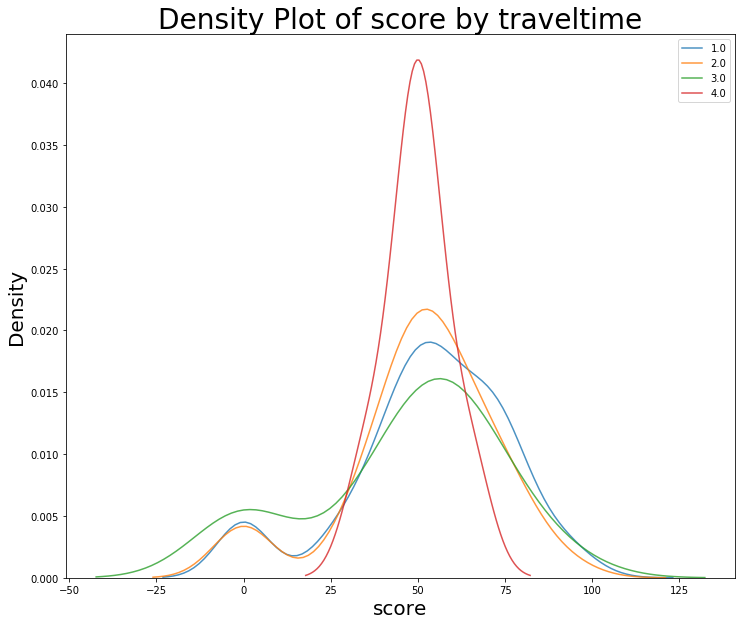

In [76]:
showDensity('score', 'traveltime')

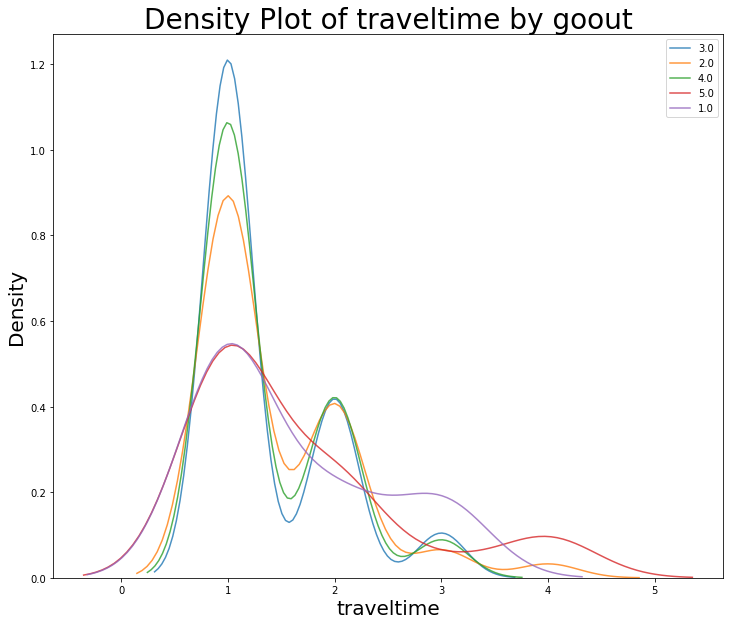

In [77]:
showDensity('traveltime', 'goout')

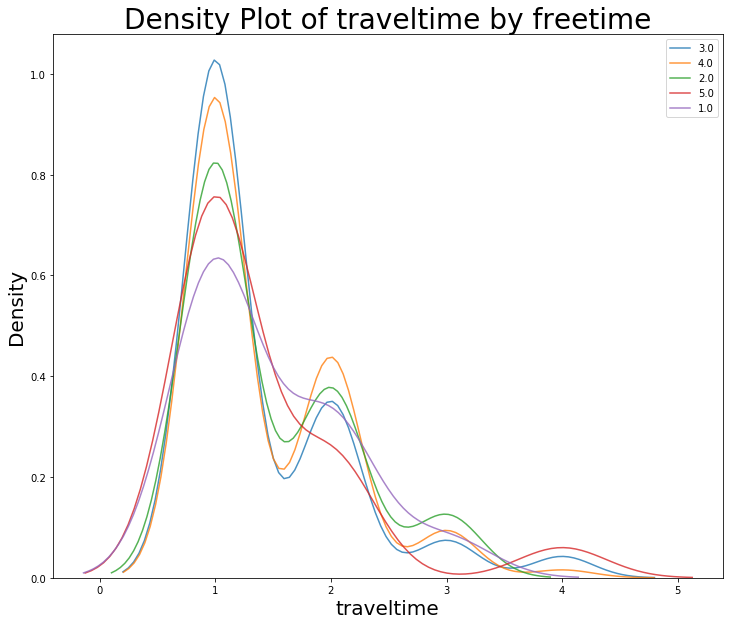

In [78]:
showDensity('traveltime', 'freetime')

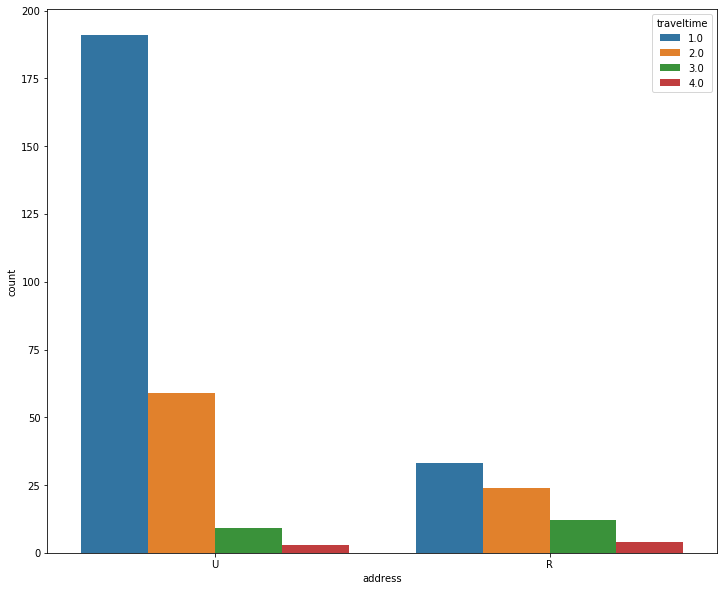

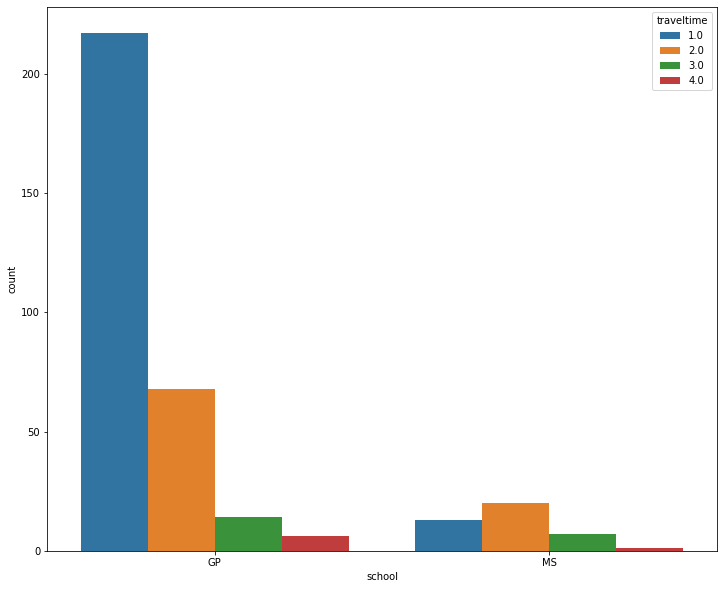

In [79]:
sns.countplot('address', hue='traveltime', data=stud)
plt.show()
sns.countplot('school', hue='traveltime', data=stud)
plt.show()

если учитывать признак school, то у нас два варианта заполнения пустых значений, в противном случае - один

In [80]:
def fillTraveltime(row):
    if pd.isnull(row['traveltime']):
        if row['school'] == 'MS':
            return 2
        else:
            return 1
    return row['traveltime']


stud['traveltime'] = stud.apply(lambda x: fillTraveltime(x), axis=1)

 ** Данные по колонке studytime ** 


,studytime
2.0,180
1.0,99
3.0,63
4.0,27
NaN,3


Количество уникальных значений 4
Распределение данных в процентном соотношении


,studytime
2.0,48.39
1.0,26.61
3.0,16.94
4.0,7.26
NaN,0.81


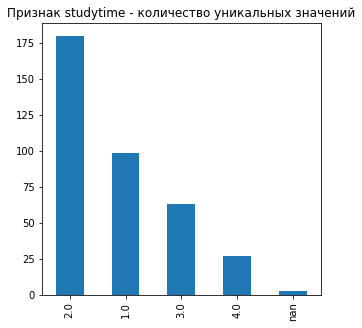

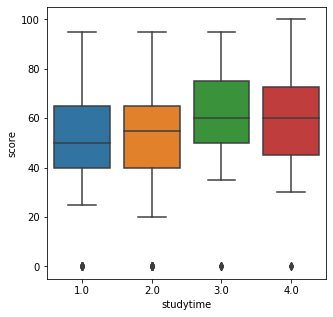

In [81]:
checkCatColumn('studytime')

Количество пропусков небольшое заполним простым способом

In [82]:
mode = stud['studytime'].mode()[0]
stud['studytime'] = stud['studytime'].fillna(mode)

 ** Данные по колонке failures ** 


,failures
0.0,279
1.0,46
NaN,18
2.0,15
3.0,14


Количество уникальных значений 4
Распределение данных в процентном соотношении


,failures
0.0,75.00
1.0,12.37
NaN,4.84
2.0,4.03
3.0,3.76


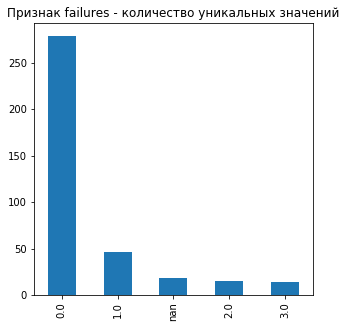

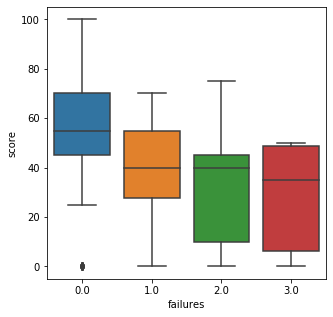

In [83]:
checkCatColumn('failures')

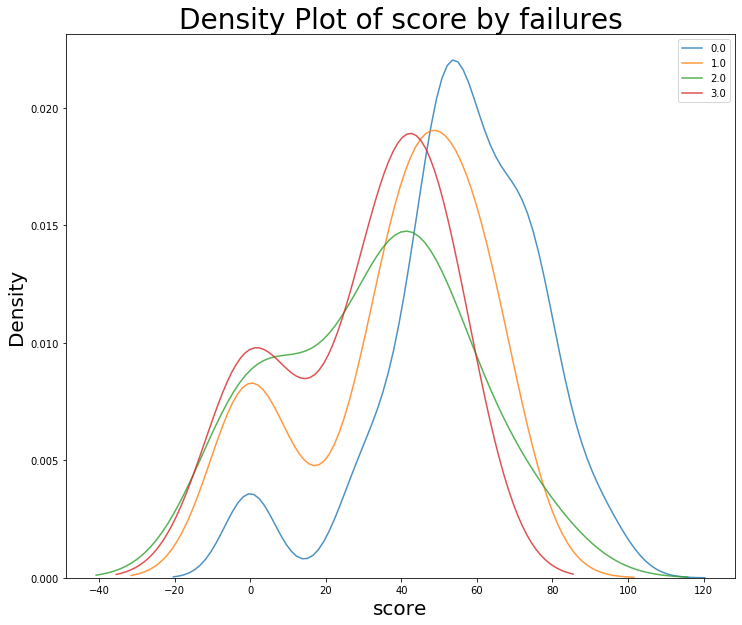

In [84]:
showDensity('score', 'failures')

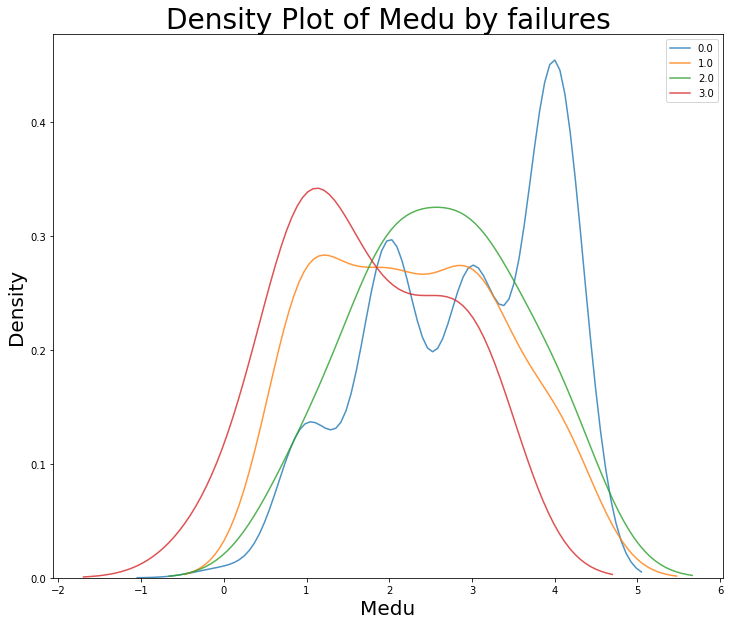

In [85]:
showDensity('Medu', 'failures')

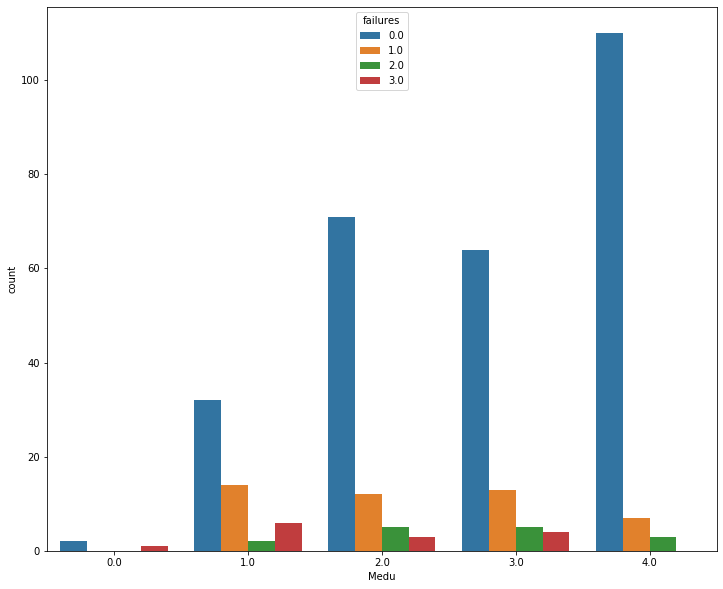

In [86]:
sns.countplot(x='Medu', hue='failures', data=stud)

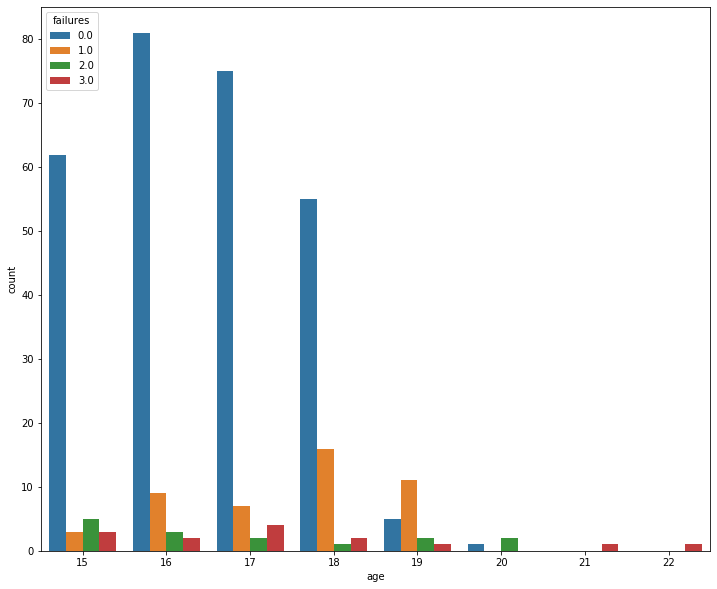

In [87]:
sns.countplot(x='age', hue='failures', data=stud)

In [88]:
def fillFailures(row):
    if pd.isnull(row['failures']):
        if row['age'] < 19:
            return 0
        else:
            return 1
    return row['failures']


stud.failures = stud.apply(lambda x: fillFailures(x), axis=1)

 ** Данные по колонке famrel ** 


,famrel
4.0,171
5.0,92
3.0,58
NaN,26
2.0,17
1.0,7
-1.0,1


Количество уникальных значений 6
Распределение данных в процентном соотношении


,famrel
4.0,45.97
5.0,24.73
3.0,15.59
NaN,6.99
2.0,4.57
1.0,1.88
-1.0,0.27


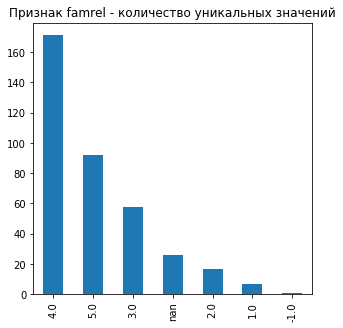

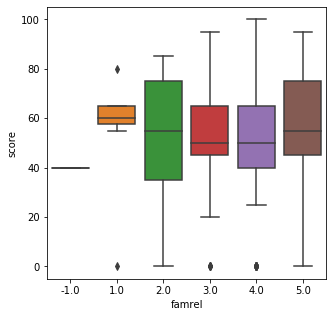

In [89]:
checkCatColumn('famrel')

Обнаружено некорректное значение  -1 - вполне возможно, что это некорректно записанное значение для "1" Заменим выброс и заполним пропуски

In [90]:
index = stud[stud.famrel == -1].index[0]
stud.loc[index, 'famrel'] = 1

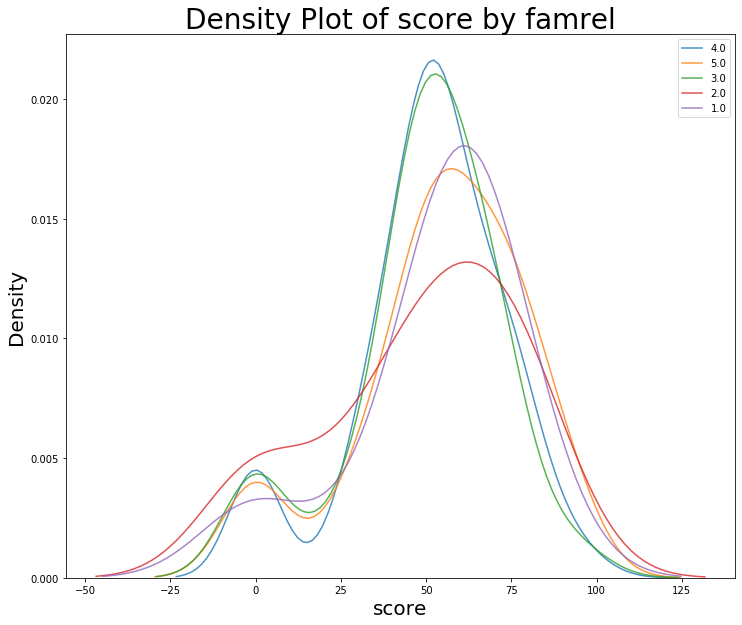

In [91]:
showDensity('score', 'famrel')

влияние famrel на целевую переменную существует

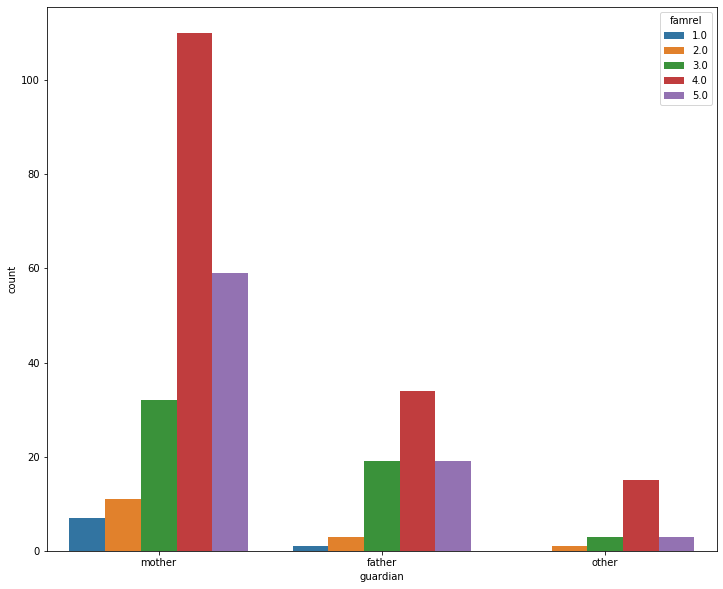

In [92]:
sns.countplot(x='guardian', hue='famrel', data=stud)

In [93]:
mode = stud.famrel.mode()[0]
stud.famrel = stud.famrel.fillna(mode)

 ** Данные по колонке freetime ** 


,freetime
3.0,150
4.0,105
2.0,58
5.0,36
1.0,15
NaN,8


Количество уникальных значений 5
Распределение данных в процентном соотношении


,freetime
3.0,40.32
4.0,28.23
2.0,15.59
5.0,9.68
1.0,4.03
NaN,2.15


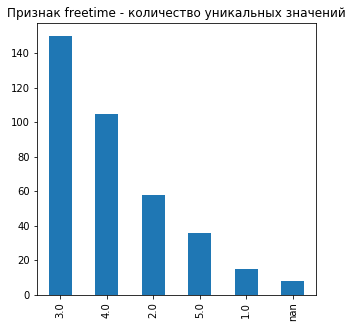

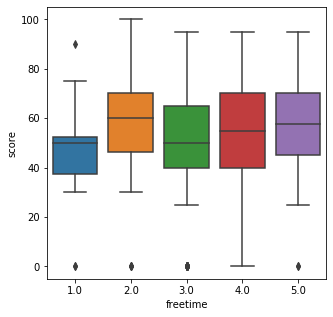

In [94]:
checkCatColumn('freetime')

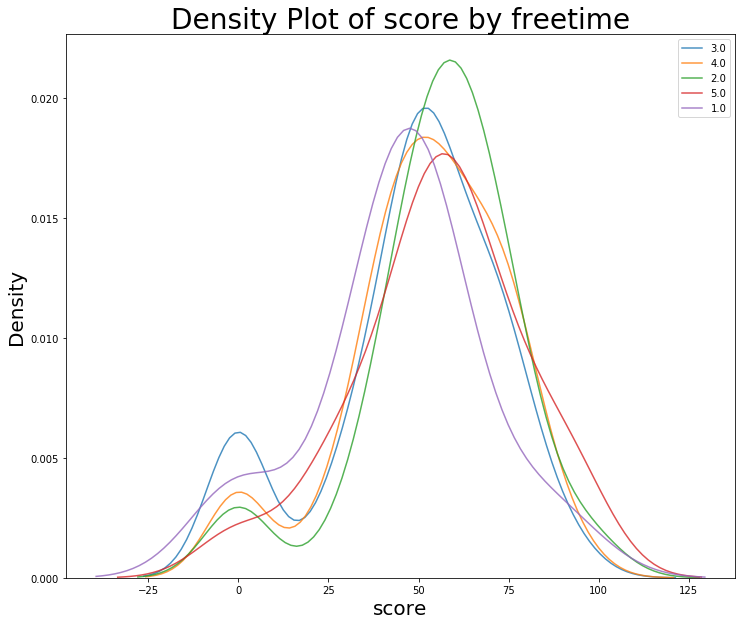

In [95]:
showDensity('score', 'freetime')

In [96]:
# заполним пропуски наиболее простым способом
mode = stud.freetime.mode()[0]
stud.freetime = stud.freetime.fillna(mode)

 ** Данные по колонке goout ** 


,goout
3.0,124
2.0,96
4.0,75
5.0,48
1.0,22
NaN,7


Количество уникальных значений 5
Распределение данных в процентном соотношении


,goout
3.0,33.33
2.0,25.81
4.0,20.16
5.0,12.90
1.0,5.91
NaN,1.88


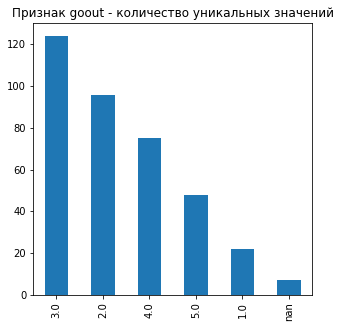

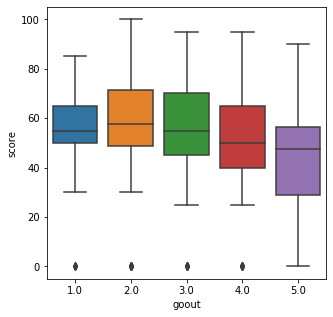

In [97]:
checkCatColumn('goout')

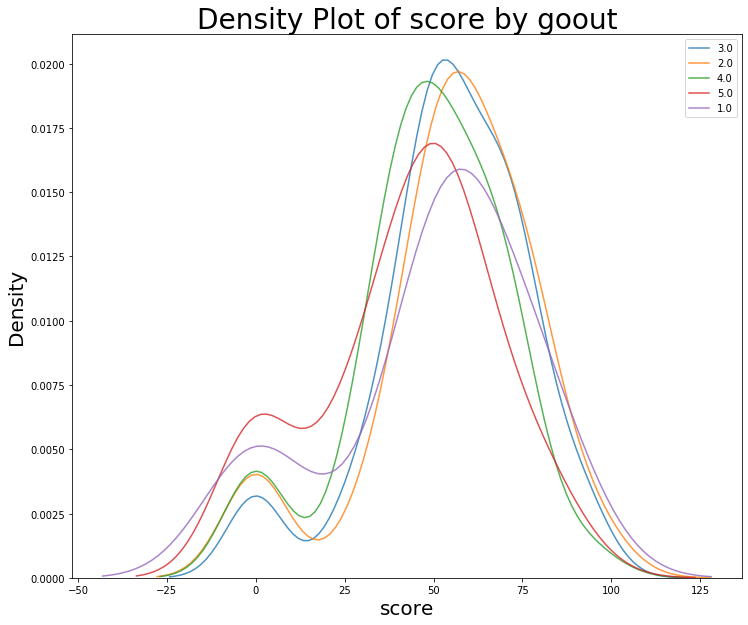

In [98]:
showDensity('score', 'goout')

In [99]:
# заполним пропуски наиболее простым способом
mode = stud.goout.mode()[0]
stud.goout = stud.goout.fillna(mode)

 ** Данные по колонке health ** 


,health
5.0,130
3.0,87
4.0,59
1.0,42
2.0,40
NaN,14


Количество уникальных значений 5
Распределение данных в процентном соотношении


,health
5.0,34.95
3.0,23.39
4.0,15.86
1.0,11.29
2.0,10.75
NaN,3.76


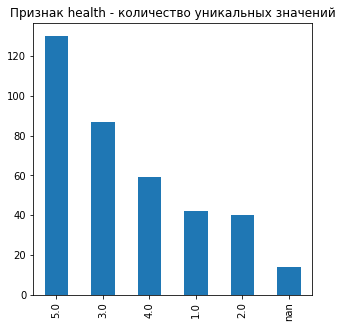

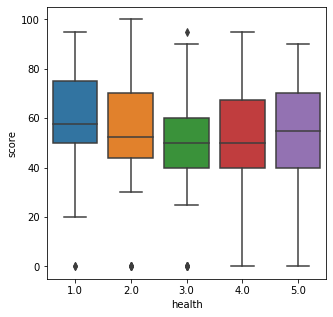

In [100]:
checkCatColumn('health')

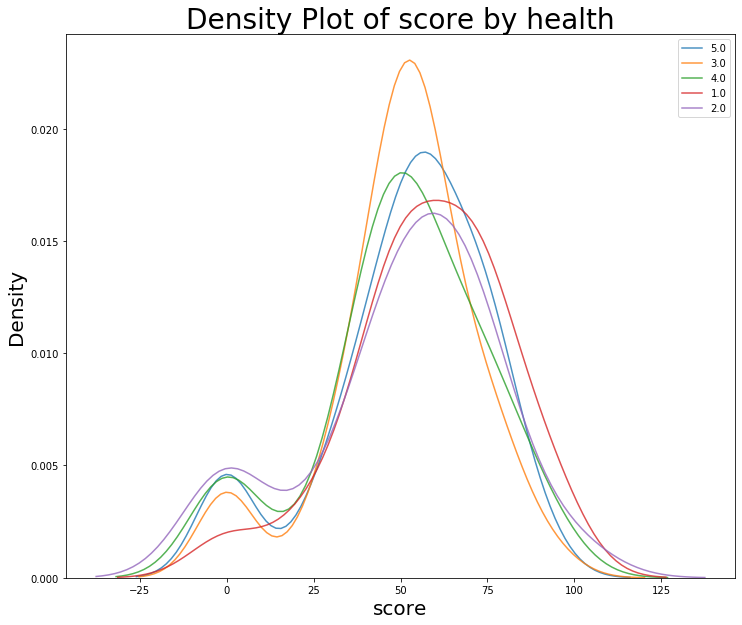

In [101]:
showDensity('score', 'health')

In [102]:
# заполним пропуски наиболее простым способом
mode = stud.health.mode()[0]
stud.health = stud.health.fillna(mode)

**Подведем итог**

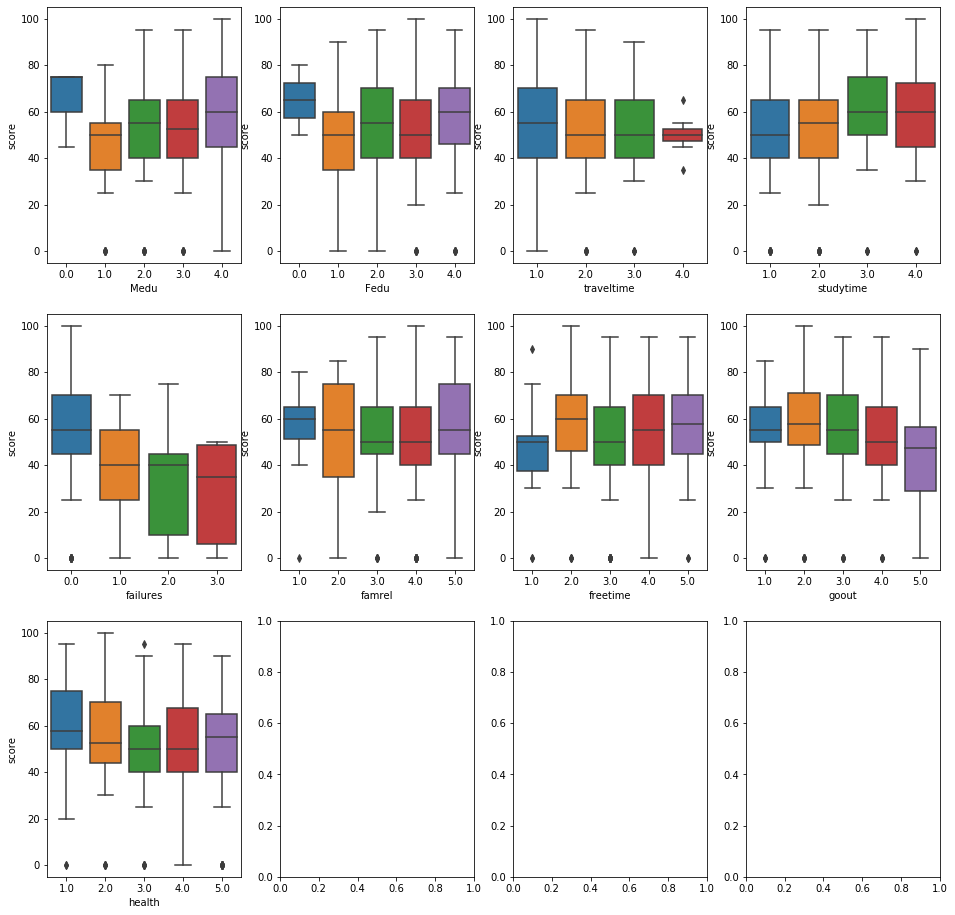

In [103]:
rows = 3

fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(16, 16))
for idx, feat in enumerate(ord_columns):
    sns.boxplot(x=feat, y='score', data=stud, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_xlabel(feat)
    axes[int(idx / 4), idx % 4].set_ylabel('score')

**Следует обратить внимание на следующие признаки: Medu, Fedu, failures, goout, famrel**

# Бинарные признаки

In [104]:
bin_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

 ** Данные по колонке sex ** 


,sex
F,195
M,177


Количество уникальных значений 2
Распределение данных в процентном соотношении


,sex
F,52.42
M,47.58


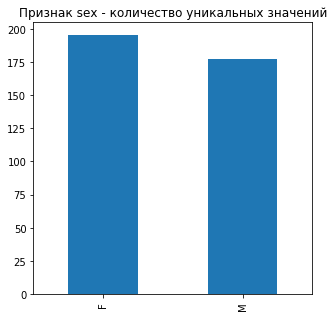

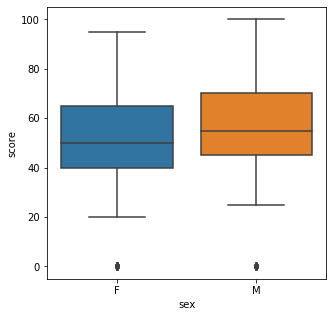

In [105]:
checkCatColumn('sex')

Данные распределены равномерно, пропусков нет.

 ** Данные по колонке address ** 


,address
U,278
R,80
NaN,14


Количество уникальных значений 2
Распределение данных в процентном соотношении


,address
U,74.73
R,21.51
NaN,3.76


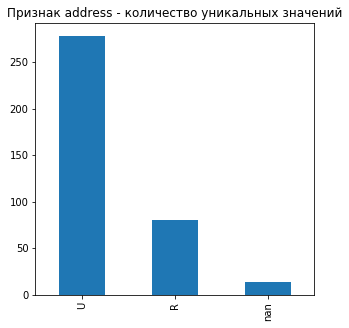

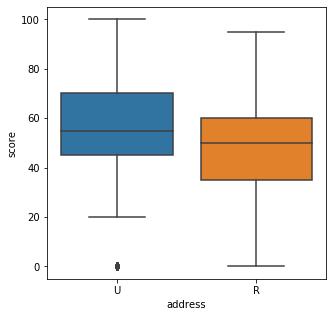

In [106]:
checkCatColumn('address')

В основном, учащиеся живут в городе. У нас есть 14 пропущенных данных, попробуем их заполнить. Есть информация о том, сколько времени требуется для того, чтобы добраться до школы. Также у нас есть информация о школах. Можно выяснить как как распределены данные по признакам.

In [107]:
pd.crosstab([stud['school'], stud['traveltime']], stud['address'])

address             R    U
school traveltime         
GP     1.0         33  198
       2.0         16   50
       3.0          5    9
       4.0          3    3
MS     1.0          5    8
       2.0         10   10
       3.0          7    0
       4.0          1    0

Если модель будет исползоваться для учеников тех же самых школ, то мы оставим этот признак, если же нет, то тут надо будет менять обработку данных

In [108]:
# заполним пропуски
def fillAddress(row):
    if pd.isnull(row['address']):
        if pd.isnull(row['school']) or pd.isnull(row['traveltime']):
            return row['address']
        if row['school'] == 'GP' and row['traveltime'] < 4:
            return 'U'
        if row['school'] == 'MS' and row['traveltime'] == 1:
            return 'U'
        return 'R'
    else:
        return row['address']


stud.address = stud.apply(lambda x: fillAddress(x), axis=1)

In [109]:
# проверим сколько пропусков осталось
stud.address.isnull().sum()

0

 ** Данные по колонке famsize ** 


,famsize
GT3,248
LE3,103
NaN,21


Количество уникальных значений 2
Распределение данных в процентном соотношении


,famsize
GT3,66.67
LE3,27.69
NaN,5.65


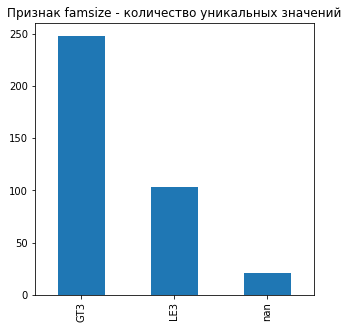

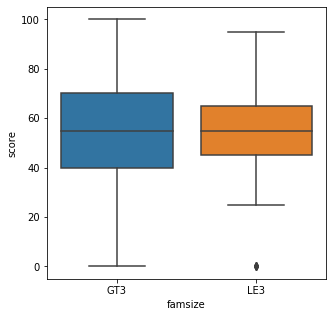

In [110]:
checkCatColumn('famsize')

Попробуем заполнить пропущенные данные по переменной. Посмотрим есть ли у нас зависимости от работы родителей и их образования и места проживания

In [111]:
pd.crosstab([stud['address'], stud['Fjob'], stud['Mjob']],
            stud['famsize'], margins=True, normalize=True)

famsize                         GT3       LE3       All
address Fjob     Mjob                                  
R       at_home  at_home   0.002849  0.000000  0.002849
                 other     0.002849  0.000000  0.002849
                 teacher   0.002849  0.000000  0.002849
        health   services  0.005698  0.000000  0.005698
        other    at_home   0.028490  0.008547  0.037037
                 health    0.002849  0.000000  0.002849
                 other     0.051282  0.008547  0.059829
                 services  0.011396  0.008547  0.019943
                 teacher   0.005698  0.002849  0.008547
        services at_home   0.014245  0.005698  0.019943
                 health    0.000000  0.002849  0.002849
                 other     0.008547  0.005698  0.014245
                 services  0.011396  0.005698  0.017094
                 teacher   0.008547  0.002849  0.011396
        teacher  at_home   0.002849  0.000000  0.002849
                 health    0.002849  0.000000  0.002849
                 other     0.005698  0.000000  0.005698
                 services  0.002849  0.000000  0.002849
U       at_home  at_home   0.005698  0.005698  0.011396
                 other     0.002849  0.005698  0.008547
                 services  0.008547  0.005698  0.014245
        health   at_home   0.005698  0.000000  0.005698
                 health    0.005698  0.002849  0.008547
                 other     0.002849  0.002849  0.005698
                 services  0.000000  0.005698  0.005698
                 teacher   0.008547  0.002849  0.011396
        other    at_home   0.022792  0.014245  0.037037
                 health    0.031339  0.017094  0.048433
                 other     0.159544  0.056980  0.216524
                 services  0.037037  0.028490  0.065527
                 teacher   0.028490  0.014245  0.042735
        services at_home   0.019943  0.002849  0.022792
                 health    0.014245  0.005698  0.019943
                 other     0.025641  0.008547  0.034188
                 services  0.094017  0.028490  0.122507
                 teacher   0.014245  0.019943  0.034188
        teacher  other     0.008547  0.002849  0.011396
                 services  0.017094  0.000000  0.017094
                 teacher   0.022792  0.011396  0.034188
All                        0.706553  0.293447  1.000000

In [112]:
ct = pd.crosstab([stud['address'], stud['Fjob'], stud['Mjob']],
                 stud['famsize'], margins=True, normalize=True)


def fillFamSize(row):
    idx1 = row['address']
    idx2 = row['Fjob']
    idx3 = row['Mjob']
    if pd.isnull(row['famsize']):
        if pd.isnull(idx1) or pd.isnull(idx2) or pd.isnull(idx3):
            return row['famsize']
        if (idx1, idx2, idx3) in ct.index:
            gt3 = ct.loc[(idx1, idx2, idx3), 'GT3']
            le3 = ct.loc[(idx1, idx2, idx3), 'LE3']
            if gt3 >= le3:
                return 'GT3'
            else:
                return 'LE3'
    return row['famsize']


stud['famsize'] = stud.apply(lambda x: fillFamSize(x), axis=1)

In [113]:
stud['famsize'].isnull().sum()

1

Осталось 1 незаполненное значение

 ** Данные по колонке Pstatus ** 


,Pstatus
T,303
NaN,36
A,33


Количество уникальных значений 2
Распределение данных в процентном соотношении


,Pstatus
T,81.45
NaN,9.68
A,8.87


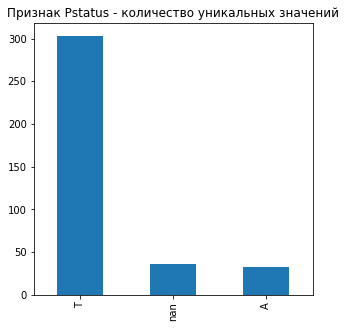

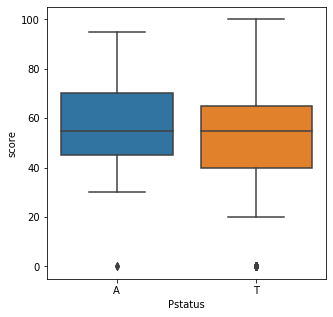

In [114]:
checkCatColumn('Pstatus')

Довольно много пропусков, попробуем связать признаки Pstatus, famrel, health между собой

In [115]:
pd.crosstab([stud['famrel'], stud['health']],
            stud['Pstatus'], margins=True, normalize=True)

Pstatus               A         T       All
famrel health                              
1.0    1.0     0.000000  0.008929  0.008929
       3.0     0.002976  0.000000  0.002976
       5.0     0.000000  0.002976  0.002976
2.0    1.0     0.000000  0.005952  0.005952
       2.0     0.000000  0.008929  0.008929
       3.0     0.002976  0.011905  0.014881
       4.0     0.002976  0.008929  0.011905
       5.0     0.002976  0.005952  0.008929
3.0    1.0     0.000000  0.014881  0.014881
       2.0     0.000000  0.020833  0.020833
       3.0     0.002976  0.047619  0.050595
       4.0     0.008929  0.011905  0.020833
       5.0     0.002976  0.041667  0.044643
4.0    1.0     0.011905  0.041667  0.053571
       2.0     0.002976  0.050595  0.053571
       3.0     0.011905  0.110119  0.122024
       4.0     0.005952  0.065476  0.071429
       5.0     0.008929  0.226190  0.235119
5.0    1.0     0.005952  0.029762  0.035714
       2.0     0.002976  0.020833  0.023810
       3.0     0.000000  0.044643  0.044643
       4.0     0.005952  0.044643  0.050595
       5.0     0.014881  0.077381  0.092262
All            0.098214  0.901786  1.000000

In [116]:
ct = pd.crosstab([stud['famrel'], stud['health']],
                 stud['Pstatus'], margins=True, normalize=True)


def fillPstatus(row):
    idx1 = row['famrel']
    idx2 = row['health']
    if pd.isnull(row['Pstatus']):
        if pd.isnull(idx1) or pd.isnull(idx2):
            return row['Pstatus']
        if (idx1, idx2) in ct.index:
            a = ct.loc[(idx1, idx2), 'A']
            t = ct.loc[(idx1, idx2), 'T']
            if a >= t:
                return 'A'
            else:
                return 'T'
    return row['Pstatus']


stud['Pstatus'] = stud.apply(lambda x: fillPstatus(x), axis=1)

In [117]:
stud['Pstatus'].isnull().sum()

0

Осталось 2 пропуска

 ** Данные по колонке schoolsup ** 


,schoolsup
no,315
yes,48
NaN,9


Количество уникальных значений 2
Распределение данных в процентном соотношении


,schoolsup
no,84.68
yes,12.90
NaN,2.42


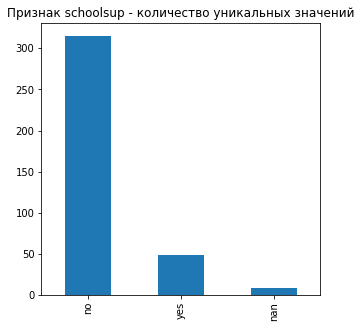

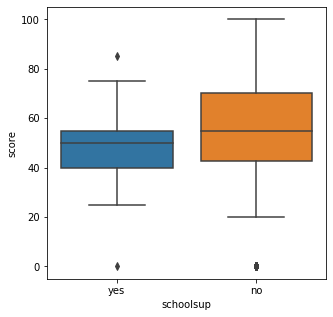

In [118]:
checkCatColumn('schoolsup')

Пропущенных значений порядка 2 процентов, скорее всего, от них можно будет избавиться

 ** Данные по колонке famsup ** 


,famsup
yes,210
no,127
NaN,35


Количество уникальных значений 2
Распределение данных в процентном соотношении


,famsup
yes,56.45
no,34.14
NaN,9.41


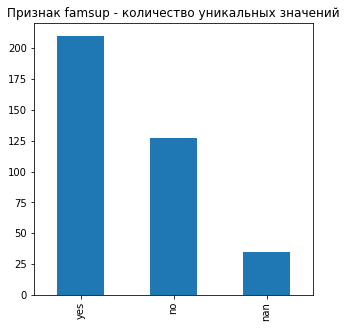

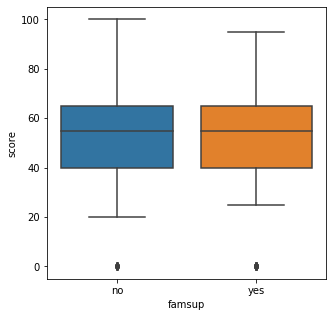

In [119]:
checkCatColumn('famsup')

In [120]:
pd.crosstab([stud['schoolsup'], stud['paid']],
            stud['famsup'], margins=True)

famsup           no  yes  All
schoolsup paid               
no        no     79   67  146
          yes    26   86  112
yes       no      7   12   19
          yes     1   16   17
All             113  181  294

получается, что только в случае, когда нет платной подготовки по математике и нет школьной поддержки, в этом случае у нас famsup уходит в сторону no

In [121]:
# заполним данные
def fillFamSup(row):
    if pd.isnull(row['famsup']):
        if row['schoolsup'] == 'no' and row['paid'] == 'no':
            return 'no'
        else:
            return 'yes'
    return row['famsup']


stud['famsup'] = stud.apply(lambda x: fillFamSup(x), axis=1)

In [122]:
stud['famsup'].isnull().sum()

0

Пропусков более нет

 ** Данные по колонке paid ** 


,paid
no,192
yes,143
NaN,37


Количество уникальных значений 2
Распределение данных в процентном соотношении


,paid
no,51.61
yes,38.44
NaN,9.95


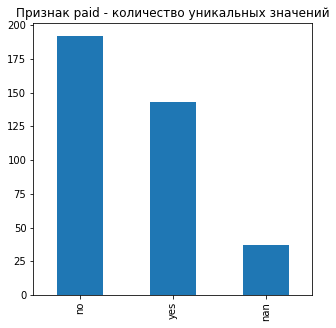

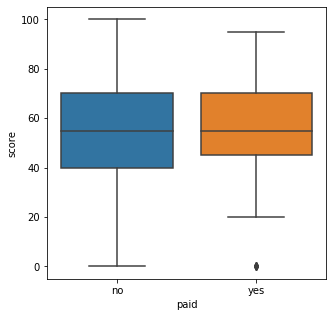

In [123]:
checkCatColumn('paid')

In [124]:
pd.crosstab([stud['schoolsup'], stud['famsup']],
            stud['paid'], margins=True)

paid               no  yes  All
schoolsup famsup               
no        no       94   26  120
          yes      67   96  163
yes       no        7    1    8
          yes      18   17   35
All               186  140  326

In [125]:
# заполним пропуски
ct = pd.crosstab([stud['schoolsup'], stud['famsup']],
                 stud['paid'], margins=True)


def fillPaid(row):
    idx1 = row['schoolsup']
    idx2 = row['famsup']
    if pd.isnull(idx1) or pd.isnull(idx2):
        return row['paid']
    if (idx1, idx2) in ct.index:
        y = ct.loc[(idx1, idx2), 'yes']
        n = ct.loc[(idx1, idx2), 'no']
        if y > n:
            return 'yes'
        else:
            return 'no'
    return row['paid']


stud['paid'] = stud.apply(lambda x: fillPaid(x), axis=1)

In [126]:
stud['paid'].isnull().sum()

0

Пропусков не осталось

 ** Данные по колонке activities ** 


,activities
yes,185
no,174
NaN,13


Количество уникальных значений 2
Распределение данных в процентном соотношении


,activities
yes,49.73
no,46.77
NaN,3.49


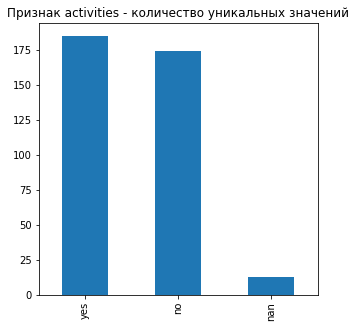

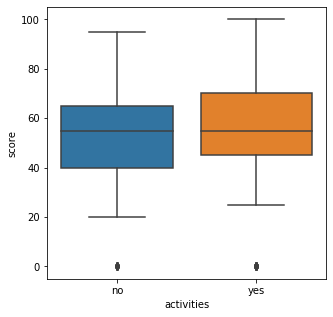

In [127]:
checkCatColumn('activities')

Данные распределены равномерно, есть небольшой процент отсутствующих данных - их можно будет удалить.

 ** Данные по колонке nursery ** 


,nursery
yes,285
no,72
NaN,15


Количество уникальных значений 2
Распределение данных в процентном соотношении


,nursery
yes,76.61
no,19.35
NaN,4.03


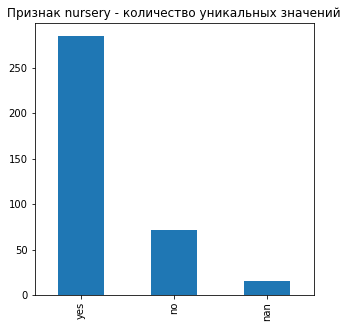

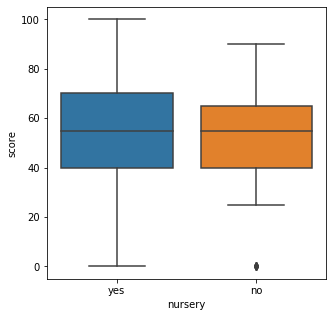

In [128]:
checkCatColumn('nursery')

In [129]:
pd.crosstab([stud['Fjob'], stud['Mjob']],
            stud['nursery'], margins=True)

nursery            no  yes  All
Fjob     Mjob                  
at_home  at_home    1    4    5
         other      0    4    4
         services   0    5    5
         teacher    0    1    1
health   at_home    1    1    2
         health     0    3    3
         other      0    2    2
         services   0    4    4
         teacher    0    4    4
other    at_home   10   22   32
         health     2   15   17
         other     25   75  100
         services   6   24   30
         teacher    3   16   19
services at_home    3   10   13
         health     2    8   10
         other      5   12   17
         services  10   36   46
         teacher    0   16   16
teacher  at_home    0    2    2
         health     0    1    1
         other      1    5    6
         services   1    6    7
         teacher    2    9   11
All                72  285  357

In [130]:
pd.crosstab([stud['guardian']],
            stud['nursery'], margins=True)

nursery,no,yes,All
guardian,,,
father,14,65,79
mother,40,188,228
other,8,12,20
All,62,265,327


В целом, получается, что можно было бы проставить для пропусков везде "yes", пока оставим как есть, попробуем разобраться с другими признаками

 ** Данные по колонке higher ** 


,higher
yes,336
no,18
NaN,18


Количество уникальных значений 2
Распределение данных в процентном соотношении


,higher
yes,90.32
no,4.84
NaN,4.84


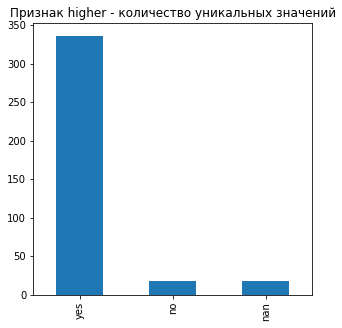

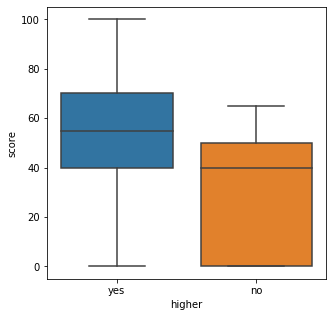

In [131]:
checkCatColumn('higher')

Зависимость довольно большая, необходимо понять, как распределить пустые значения

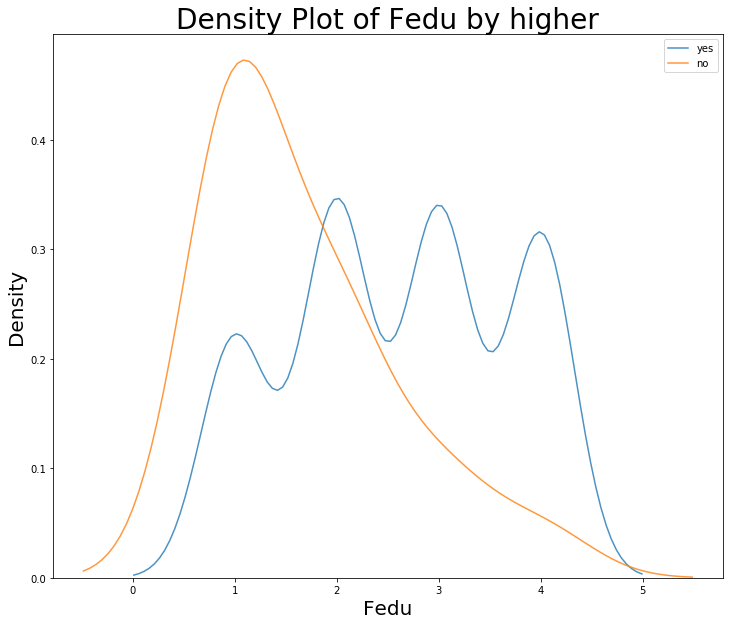

In [132]:
showDensity('Fedu', 'higher')

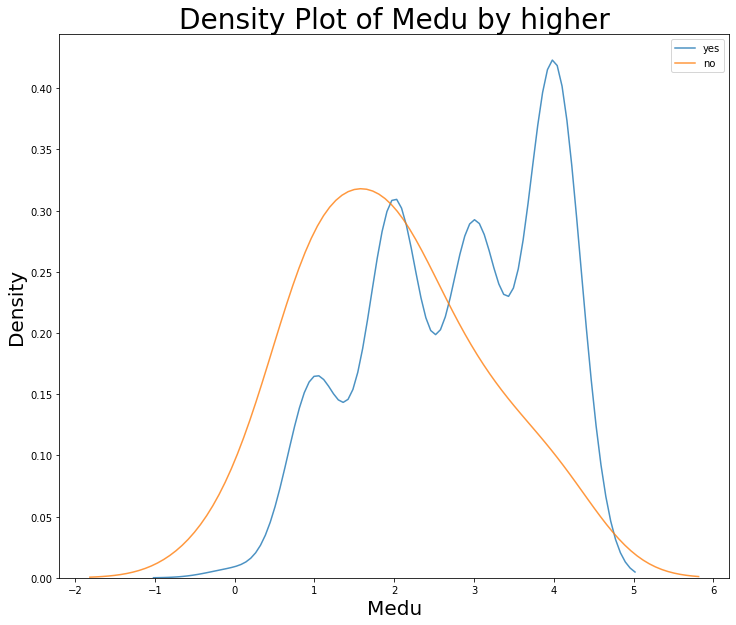

In [133]:
showDensity('Medu', 'higher')

In [134]:
stud[stud['higher'] == 'no']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_ismissing,famsize_ismissing,Pstatus_ismissing,Medu_ismissing,Fedu_ismissing,Mjob_ismissing,Fjob_ismissing,reason_ismissing,guardian_ismissing,traveltime_ismissing,studytime_ismissing,failures_ismissing,schoolsup_ismissing,famsup_ismissing,paid_ismissing,activities_ismissing,nursery_ismissing,"studytime, granular_ismissing",higher_ismissing,internet_ismissing,romantic_ismissing,famrel_ismissing,freetime_ismissing,goout_ismissing,health_ismissing,absences_ismissing,score_ismissing,num_missing
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,yes,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,no,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,1
148,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,yes,yes,no,yes,-3.0,no,yes,yes,3.0,3.0,2.0,5.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,4.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1
153,GP,M,19,U,GT3,T,3.0,2.0,services,at_home,home,mother,1.0,1.0,1.0,no,yes,yes,no,yes,-3.0,no,yes,yes,4.0,5.0,4.0,5.0,0.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,3
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,other,course,mother,1.0,1.0,2.0,no,no,no,NaN,yes,-3.0,no,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,4
163,GP,M,17,U,GT3,T,1.0,3.0,at_home,services,course,father,1.0,1.0,0.0,no,no,no,NaN,yes,-3.0,no,yes,no,5.0,3.0,3.0,2.0,2.0,50.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,1
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,no,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,5.0,0.0,35.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,3
165,GP,M,16,U,GT3,T,3.0,2.0,services,services,course,mother,2.0,1.0,1.0,no,yes,yes,yes,no,-3.0,no,no,no,4.0,5.0,2.0,2.0,16.0,60.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
166,GP,M,16,U,GT3,T,2.0,2.0,other,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1


In [135]:
stud[stud['higher'].isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_ismissing,famsize_ismissing,Pstatus_ismissing,Medu_ismissing,Fedu_ismissing,Mjob_ismissing,Fjob_ismissing,reason_ismissing,guardian_ismissing,traveltime_ismissing,studytime_ismissing,failures_ismissing,schoolsup_ismissing,famsup_ismissing,paid_ismissing,activities_ismissing,nursery_ismissing,"studytime, granular_ismissing",higher_ismissing,internet_ismissing,romantic_ismissing,famrel_ismissing,freetime_ismissing,goout_ismissing,health_ismissing,absences_ismissing,score_ismissing,num_missing
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,home,mother,1.0,1.0,0.0,no,yes,yes,no,no,-3.0,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,yes,no,-6.0,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,1
96,GP,M,16,U,GT3,T,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,no,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,4
142,GP,F,15,U,GT3,T,4.0,3.0,teacher,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,3
149,GP,M,15,U,LE3,T,2.0,1.0,services,other,course,mother,4.0,1.0,3.0,no,no,no,no,yes,-3.0,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,3
158,GP,M,16,R,GT3,T,2.0,2.0,at_home,other,course,mother,3.0,1.0,0.0,no,no,no,no,no,-3.0,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,3
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,course,father,3.0,1.0,0.0,no,yes,yes,yes,no,-3.0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,2


In [136]:
pd.crosstab([stud['Medu'], stud['Fedu']], stud['higher'])

higher     no  yes
Medu Fedu         
0.0  1.0    1    0
     2.0    0    2
1.0  1.0    3   29
     2.0    1   11
     3.0    2    4
     4.0    0    2
2.0  1.0    5   19
     2.0    1   45
     3.0    0   17
     4.0    0    6
3.0  1.0    1   12
     2.0    2   20
     3.0    0   33
     4.0    0   16
4.0  1.0    0    1
     2.0    1   17
     3.0    0   39
     4.0    1   63

In [137]:
pd.crosstab([stud['famsup'],stud['paid']], stud['higher'])

higher       no  yes
famsup paid         
no     no    12  121
       yes    0    1
yes    no     1   39
       yes    5  175

Пока не совсем понятно, как лучше выстроить зависимость, попробуем немного позже определить

 ** Данные по колонке internet ** 


,internet
yes,285
no,55
NaN,32


Количество уникальных значений 2
Распределение данных в процентном соотношении


,internet
yes,76.61
no,14.78
NaN,8.60


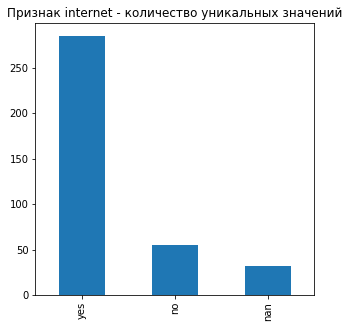

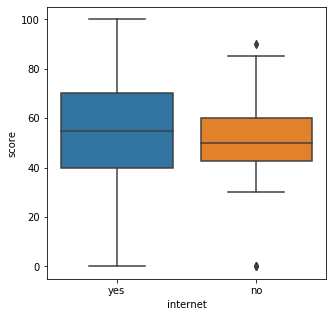

In [138]:
checkCatColumn('internet')

In [139]:
pd.crosstab([stud['address']],
            stud['internet'], margins=True)

internet,no,yes,All
address,,,
R,24,54,78
U,31,231,262
All,55,285,340


В целом, выборка тоже несбалансирована. Попробуем выяснить зависимости

In [140]:
pd.crosstab([stud['Fjob'], stud['Mjob'], stud['address']],
            stud['internet'], margins=True)

internet                   no  yes  All
Fjob     Mjob     address              
at_home  at_home  U         0    4    4
         other    R         1    0    1
                  U         0    3    3
         services U         0    4    4
         teacher  R         0    2    2
health   at_home  U         0    2    2
         health   U         0    3    3
         other    U         1    1    2
         services R         0    2    2
                  U         0    2    2
         teacher  U         2    2    4
other    at_home  R         9    4   13
                  U         5   11   16
         health   R         0    1    1
                  U         0   17   17
         other    R         4   17   21
                  U        10   63   73
         services R         2    5    7
                  U         3   19   22
         teacher  R         0    3    3
                  U         1   15   16
services at_home  R         2    4    6
                  U         0    7    7
         health   R         0    2    2
                  U         0    6    6
         other    R         3    2    5
                  U         0    9    9
         services R         1    5    6
                  U         6   34   40
         teacher  R         0    4    4
                  U         0   12   12
teacher  at_home  R         1    0    1
         health   R         1    0    1
         other    R         0    2    2
                  U         3    1    4
         services R         0    1    1
                  U         0    6    6
         teacher  U         0   10   10
All                        55  285  340

In [141]:
# заполним пропуски
ct = pd.crosstab([stud['Fjob'], stud['Mjob'], stud['address']],
                 stud['internet'], margins=True)


def fillInternet(row):
    idx1 = row['Fjob']
    idx2 = row['Mjob']
    idx3 = row['address']
    if pd.isnull(idx1) or pd.isnull(idx2):
        return row['internet']
    if (idx1, idx2, idx3) in ct.index:
        y = ct.loc[(idx1, idx2, idx3), 'yes']
        n = ct.loc[(idx1, idx2, idx3), 'no']
        if y > n:
            return 'yes'
        else:
            return 'no'
    return row['internet']


stud['internet'] = stud.apply(lambda x: fillInternet(x), axis=1)

In [142]:
stud['internet'].isnull().sum()

2

Осталось 2 пустых значения - можем их удалить позже

 ** Данные по колонке romantic ** 


,romantic
no,227
yes,118
NaN,27


Количество уникальных значений 2
Распределение данных в процентном соотношении


,romantic
no,61.02
yes,31.72
NaN,7.26


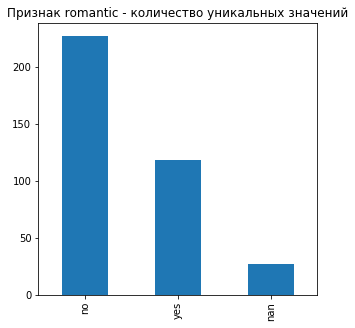

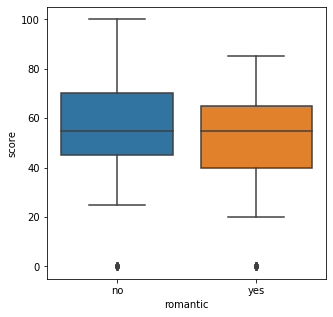

In [143]:
checkCatColumn('romantic')

In [144]:
pd.crosstab([stud['address'], stud['age']],
            stud['romantic'], margins=True)

romantic      no  yes  All
address age               
R       15     6    8   14
        16     6    2    8
        17    15    7   22
        18    17    9   26
        19     4    1    5
        20     0    1    1
        21     1    0    1
U       15    46   10   56
        16    62   25   87
        17    38   26   64
        18    24   20   44
        19     6    8   14
        20     2    0    2
        22     0    1    1
All          227  118  345

In [145]:
# заполним данные
ct = pd.crosstab([stud['address'], stud['age'], ],
                 stud['romantic'], margins=True)


def fillRomantic(row):
    idx1 = row['address']
    idx2 = row['age']

    if pd.isnull(idx1) or pd.isnull(idx2):
        return row['romantic']
    if (idx1, idx2) in ct.index:
        y = ct.loc[(idx1, idx2), 'yes']
        n = ct.loc[(idx1, idx2), 'no']
        if y > n:
            return 'yes'
        else:
            return 'no'
    return row['romantic']


stud['romantic'] = stud.apply(lambda x: fillRomantic(x), axis=1)

In [146]:
stud['romantic'].isnull().sum()

0

Осталось 0 незаполненных значений

Посмотрим на бинарные признаки и на их влияние на целевую переменную

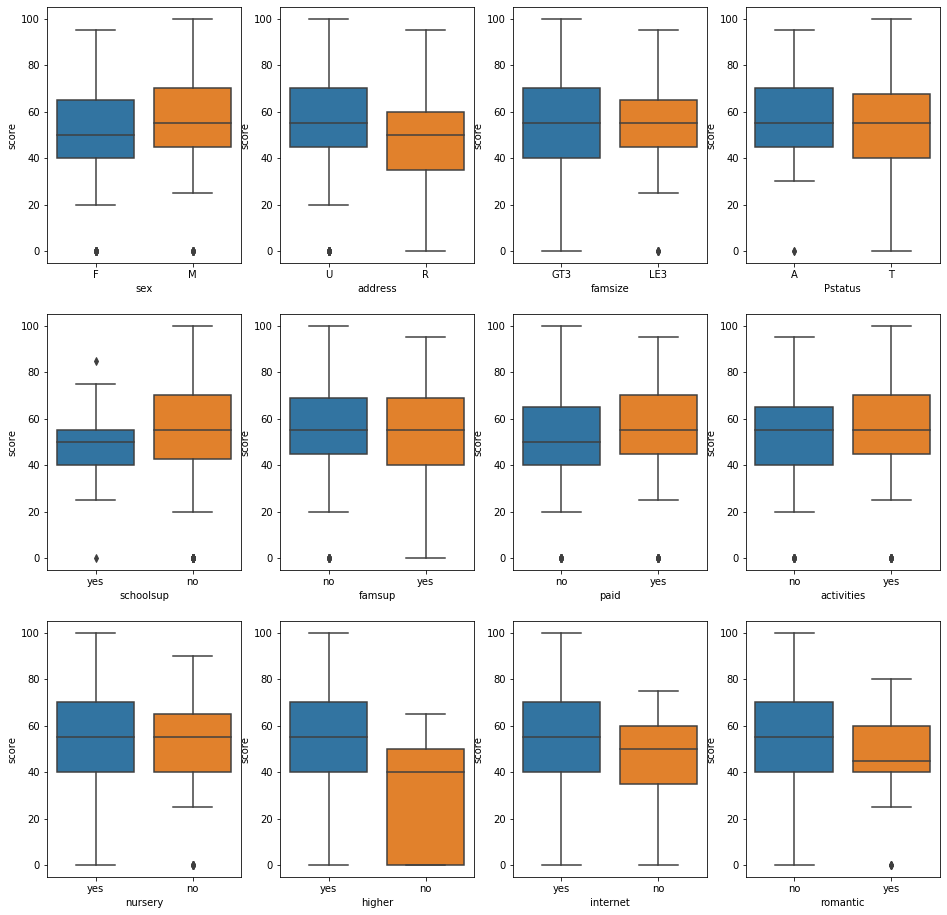

In [147]:
rows = 3

fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(16, 16))
for idx, feat in enumerate(bin_columns):
    sns.boxplot(x=feat, y='score', data=stud, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].set_xlabel(feat)
    axes[int(idx / 4), idx % 4].set_ylabel('score')

Мы смотрим на зависимости с учетом  score = 0. Обнаружилось что в ряд признаков, например, higher -  имеет относительно много значений score=0 для higher = no. Для ряда признаков, значение score=0 является выбросом.    
Переведем бинарные значения в числовые и попробуем найти связи   
**Следует обратить внимание на следующие признаки: sex, address, schoolsup, activities, higher, romantic**

# Проверка связей между бинарными параметрами

Также попробуем привести score к виду - сдал/не сдал

In [148]:
check_binf_score = pd.DataFrame()
check_binf_score = stud[list(bin_columns + ['score'])].copy()
check_binf_score['score'] = stud.score.apply(lambda x: x if x == 0 else 1)

for col in bin_columns:
    check_binf_score[col] = pd.factorize(check_binf_score[col], sort=True)[0]

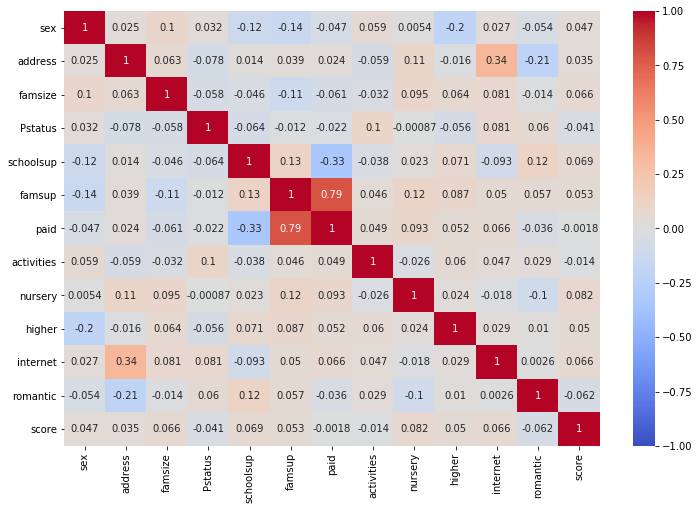

In [149]:
matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(check_binf_score.corr(), vmin=-1, vmax=1,
            center=0, annot=True, cmap='coolwarm')

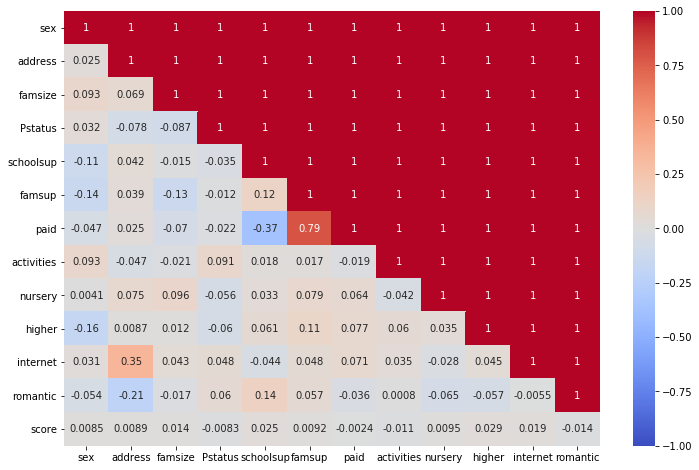

In [150]:
df_ = pd.DataFrame(index=bin_columns, columns=bin_columns).fillna(1)
cols = list(combinations(list(bin_columns + ['score']), 2))
for comb in cols:
    rom = pd.factorize(stud[comb[1]], sort=True)[0]
    nur = pd.factorize(stud[comb[0]], sort=True)[0]
    mat = round(matthews_corrcoef(rom, nur), 4)
    df_.loc[comb[1], comb[0]] = mat
matplotlib.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(df_, vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm')

На основании данных тепловой карты попробуем еще раз запонить пропуски для higher

In [151]:
pd.crosstab([stud['sex'], stud['famsup'], stud['Fedu']], stud['higher'])

higher           no  yes
sex famsup Fedu         
F   no     1.0    2   15
           2.0    0   20
           3.0    0   16
           4.0    0    9
    yes    1.0    1   24
           2.0    0   34
           3.0    0   34
           4.0    0   36
M   no     1.0    6   15
           2.0    2   19
           3.0    2   16
           4.0    0   12
    yes    1.0    1    7
           2.0    3   22
           3.0    0   27
           4.0    1   30

In [152]:
pd.crosstab([stud['sex'],stud['Medu'], stud['Fedu']], stud['higher'])

higher         no  yes
sex Medu Fedu         
F   0.0  1.0    1    0
         2.0    0    1
    1.0  1.0    0   21
         2.0    0    4
         3.0    0    2
         4.0    0    2
    2.0  1.0    2    9
         2.0    0   28
         3.0    0   11
         4.0    0    6
    3.0  1.0    0    8
         2.0    0   11
         3.0    0   19
         4.0    0    8
    4.0  1.0    0    1
         2.0    0   10
         3.0    0   18
         4.0    0   29
M   0.0  2.0    0    1
    1.0  1.0    3    8
         2.0    1    7
         3.0    2    2
    2.0  1.0    3   10
         2.0    1   17
         3.0    0    6
    3.0  1.0    1    4
         2.0    2    9
         3.0    0   14
         4.0    0    8
    4.0  2.0    1    7
         3.0    0   21
         4.0    1   34

На основании исследований, можно попробовать заполнить недостающие значения. Это крайне приблизительно, конечно.

In [153]:
def fillHigher(row):
    if pd.isnull(row['higher']):
        if row['famsize'] == 'GT3' and row['Medu'] <= 1 and row['Fedu'] <= 1:
            return 'no'
        else:
            return 'yes'
    return row['higher']


stud['higher'] = stud.apply(lambda x: fillHigher(x), axis=1)

# Финальная проверка данных

In [154]:
# очистим датасет от служебной информации
ismissing_columns = [col for col in stud.columns if 'missing' in col]
features = list(set(stud.columns) - set(ismissing_columns))
stud = stud[features]

# Проведем тест Стьюдента

In [155]:
# реализация теста
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:

        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [156]:
# Бинарные признаки 
for col in bin_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [157]:
#Порядковые признаки
for col in ord_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


In [158]:
# Номинальные признаки
for col in nom_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [159]:
features = ['age', 'absences', 'sex', 'address',
            'higher', 'romantic', 'Medu', 'failures', 'goout', 'Mjob', 'score']
stud = stud[features]

In [160]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       372 non-null    int64  
 1   absences  372 non-null    float64
 2   sex       372 non-null    object 
 3   address   372 non-null    object 
 4   higher    372 non-null    object 
 5   romantic  372 non-null    object 
 6   Medu      372 non-null    float64
 7   failures  372 non-null    float64
 8   goout     372 non-null    float64
 9   Mjob      372 non-null    object 
 10  score     372 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 44.9+ KB


In [163]:
stud.head()

,age,absences,sex,address,higher,romantic,Medu,failures,goout,Mjob,score
0,18,6.0,F,U,yes,no,4.0,0.0,4.0,at_home,30.0
1,17,4.0,F,U,yes,no,1.0,0.0,3.0,at_home,30.0
2,15,10.0,F,U,yes,no,1.0,3.0,2.0,at_home,50.0
3,15,2.0,F,U,yes,no,4.0,0.0,2.0,health,75.0
4,16,4.0,F,U,yes,no,3.0,0.0,2.0,other,50.0


# Выводы

* В данных по ряду колонок пропуски достигали 15-16 процентов. Также отсутсвовали данные в целевой переменной. Эти строки пришлось удалить  
* Выбросы были найдены в трех параметрах, один из которых используется в финальном датасете   
* Найдены положительная корреляции между образованием родителей(матери) и количеством баллов на экзамене   
* Отдельно следует отметить факт наличия в целевом признаке нулевых значений. Предлагается их удалять в зависимости от выбора модели    
* Самые важные параметры, которые рекомендуется использовать для построения модели: **'age', 'absences', 'sex', 'address', 'higher', 'romantic', 'Medu', 'failures', 'goout', 'Mjob', 'score'**    
* Преобразование данных, необходимое для работы с моделью - не выполнялось. Формирование новых признаков - не выполнялось. Эти этапы должны выполняться при непосредственной работе с выбранной моделью